# DonorsChoose

In [1]:
print('lucky')

lucky


<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
7
from tqdm import tqdm
import os

#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.model_selection import train_test_split

## 1.1 Reading Data

In [10]:
# project_data = pd.read_csv('train_data.xlsx')
# # it is unbalanced data with 1 --> 92706 ,0 --> 16542
# resource_data = pd.read_csv('resources.xlsx')

In [13]:
from pandas import ExcelWriter
project_data = pd.read_excel('train_data.xlsx', sheetname='Sheet1')
#resource_data = pd.read_excel('resources.xlsx', sheetname='Sheet1')

In [14]:
project_data['project_subject_subcategories'].reset_index()

index                 project_subject_subcategories
0      160221                                 ESL, Literacy
1      140945              Civics & Government, Team Sports
2       21895                Health & Wellness, Team Sports
3          45                         Literacy, Mathematics
4      172407                                   Mathematics
5      141660           Literature & Writing, Special Needs
6       21147                       Literacy, Special Needs
7       94142                                   Mathematics
8      112489                             Health & Wellness
9      158561                Literacy, Literature & Writing
10      43184                                      Literacy
11     127083                  Literacy, Parent Involvement
12      19090  Environmental Science, Health & Life Science
13      15126                                 Special Needs
14      62232                                      Literacy
15      67303                             Health & Wellness
16     127215                       Literacy, Special Needs
17     157771        Applied Sciences, Literature & Writing
18     122186                             Early Development
19     146331                             Health & Wellness
20      75560                                      Literacy
21     132078          Health & Life Science, Special Needs
22      84810                                      Literacy
23       8636                                         Music
24      21478                 Applied Sciences, Mathematics
25      20142                                   Mathematics
26      33903                         Literacy, Mathematics
27       1156                Foreign Languages, Mathematics
28      35430                       Literacy, Special Needs
29      22088                               Literacy, Other
...       ...                                           ...
15670   64537                                         Other
15671  136683                                   Mathematics
15672   17537                                      Literacy
15673  180595                         Literacy, Mathematics
15674   75467                    Special Needs, Visual Arts
15675  124743                         Literacy, Mathematics
15676   48885                         Literacy, Mathematics
15677  129281            Environmental Science, Mathematics
15678    2866                                         Music
15679   37824                 Character Education, Literacy
15680    8042                                   Mathematics
15681  108442                         Environmental Science
15682  129507                Literacy, Literature & Writing
15683   90459                              Applied Sciences
15684   58799                              Applied Sciences
15685  155906                         Literacy, Mathematics
15686   41638                          Music, Special Needs
15687   78147                     Literacy, Social Sciences
15688  149193                Literacy, Literature & Writing
15689   18833                         Warmth, Care & Hunger
15690   77775                       Literacy, Special Needs
15691  147730                   Early Development, Literacy
15692   40161                                 Special Needs
15693   10877                                 Special Needs
15694   61106                                   Team Sports
15695   57928            Environmental Science, Mathematics
15696  114439            College & Career Prep, Mathematics
15697  148776             Literature & Writing, Mathematics
15698  109057             Literature & Writing, Mathematics
15699  100901                              Applied Sciences

[15700 rows x 2 columns]

In [15]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (15700, 16)
--------------------------------------------------
The attributes of data : ['id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [17]:
# Taking my class label in y
y = project_data['project_is_approved']
project_data.drop('project_is_approved',axis=1,inplace=False)
#Splitting in to 80% train and 20% test data
X_train, X_test, y_train, y_test = train_test_split(project_data, y, test_size=0.2, random_state=42)
#Splitting my train again to 80% train and 20% cross validation data
X_final_train, X_cv, y_final_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
print(len(X_final_train))
print(len(X_cv))
print(len(y_final_train))
print(len(y_cv))
X_test.shape

10048
2512
10048
2512


(3140, 16)

<h3>Teachers_Prefix Response Coding</h3>

In [19]:
from tqdm import tqdm
#imputation in train dataset
X_final_train['teacher_prefix'].fillna('Mr.',inplace = True)
print('#'*100)

#imputation in test dataset
X_test['teacher_prefix'].fillna('Mr.',inplace = True)
print('#'*100)

#imputation in cv dataset
X_cv['teacher_prefix'].fillna('Mr.',inplace = True)
print('#'*100)

# Response coding of Train dataset
def Response_coding_function(Dataframe_coloum ,coloumn_name , y_train_input):
    short_data = pd.DataFrame()
    short_data[coloumn_name] = Dataframe_coloum.tolist()
    short_data['y_probab_class1'] = y_train_input.reset_index(drop=True).tolist()

    positive_data =  short_data.groupby(coloumn_name).mean()
    print(positive_data.head())
    return positive_data
import re
def replace_categorical_to_probab(Dataframe_coloum , ResponseCodingDataset):
    columnName = ResponseCodingDataset.reset_index().columns[0]
    list1 = Dataframe_coloum.tolist()
    for i in tqdm(range(len(ResponseCodingDataset.reset_index()[columnName]))):
        Dataframe_coloum.replace(ResponseCodingDataset.reset_index()[columnName][i],\
                                     ResponseCodingDataset.reset_index()['y_probab_class1'][i],inplace=True)
    
    Dataframe_coloum.replace(r'[^0-9]+',.5,regex=True,inplace = True)
    
    return Dataframe_coloum

####################################################################################################
####################################################################################################
####################################################################################################


In [20]:
a = X_cv['project_subject_subcategories'].replace(r'[^0-9]+',.5,regex=True)
a.value_counts()

0.5    2512
Name: project_subject_subcategories, dtype: int64

In [21]:
#Train
ResponseCodingDataset = Response_coding_function(X_final_train['teacher_prefix'],'teacher_prefix',y_final_train)
replace_categorical_to_probab(X_final_train['teacher_prefix'] , ResponseCodingDataset).head()

#CV
replace_categorical_to_probab(X_cv['teacher_prefix'] , ResponseCodingDataset).head()

#Test
replace_categorical_to_probab(X_test['teacher_prefix'] , ResponseCodingDataset).head()



                y_probab_class1
teacher_prefix                 
Mr.                    0.849654
Mrs.                   0.847391
Ms.                    0.847339
Teacher                0.768908


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15.63it/s]


10440    0.847391
34613    0.847339
91347    0.847391
55073    0.847391
22809    0.847391
Name: teacher_prefix, dtype: float64

<h3>School_state_one_hot_encoding</h3>

In [22]:
#Train
ResponseCodingDataset = Response_coding_function(X_final_train['school_state'],'school_state',y_final_train)
replace_categorical_to_probab(X_final_train['school_state'] , ResponseCodingDataset).head()

#CV
replace_categorical_to_probab(X_cv['school_state'] , ResponseCodingDataset).head()
#Test

replace_categorical_to_probab(X_test['school_state'] , ResponseCodingDataset).head()

              y_probab_class1
school_state                 
AK                   0.810811
AL                   0.851351
AR                   0.788889
AZ                   0.815000
CA                   0.862955


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:03<00:00, 13.21it/s]


10440    0.858974
34613    0.818898
91347    0.862955
55073    0.844828
22809    0.829819
Name: school_state, dtype: float64

<h3>project_grade_category_one_hot_encoding</h3>

In [24]:
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
Scalar = StandardScaler()

temp = X_final_train['project_grade_category'].str.replace('Grades PreK-2','1')
temp = temp.str.replace('Grades 3-5','2')
temp = temp.str.replace('Grades 6-8','3')
temp = temp.str.replace('Grades 9-12','4')
Scalar.fit(temp.values.reshape(-1,1))
project_grade_category_encoding_fitmodel_train = Scalar.transform(temp.values.reshape(-1,1))
print('1) One_hot_encoding Rows:',len(project_grade_category_encoding_fitmodel_train),' and Coloums: 4')

temp = X_test['project_grade_category'].str.replace('Grades PreK-2','1')
temp = temp.str.replace('Grades 3-5','2')
temp = temp.str.replace('Grades 6-8','3')
temp = temp.str.replace('Grades 9-12','4')
project_grade_category_encoding_fitmodel_test = Scalar.transform(temp.values.reshape(-1,1))
print('2) One_hot_encoding Rows:',len(project_grade_category_encoding_fitmodel_test),' and Coloums: 4')

temp = X_cv['project_grade_category'].str.replace('Grades PreK-2','1')
temp = temp.str.replace('Grades 3-5','2')
temp = temp.str.replace('Grades 6-8','3')
temp = temp.str.replace('Grades 9-12','4')
project_grade_category_encoding_fitmodel_cv = Scalar.transform(temp.values.reshape(-1,1))
print('3) One_hot_encoding Rows:',len(project_grade_category_encoding_fitmodel_cv),' and Coloums: 4')

1) One_hot_encoding Rows: 10048  and Coloums: 4
2) One_hot_encoding Rows: 3140  and Coloums: 4
3) One_hot_encoding Rows: 2512  and Coloums: 4


<h3>project_subject_categories_one_hot_encoding</h3>

In [25]:
catogories = list(X_final_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_final_train['clean_categories'] = cat_list
X_final_train.drop(['project_subject_categories'], axis=1, inplace=True)


#Train
ResponseCodingDataset = Response_coding_function(X_final_train['clean_categories'],'clean_categories',y_final_train)
print(ResponseCodingDataset)
replace_categorical_to_probab(X_final_train['clean_categories'] , ResponseCodingDataset).head()

#CV
#replace_categorical_to_probab(X_cv['clean_categories'] , ResponseCodingDataset).head()


#############################################################################################################################
# Added for cleanig test data also
#############################################################################################################################
catogories = list(X_test['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

#Test

replace_categorical_to_probab(X_test['clean_categories'] , ResponseCodingDataset).head()

# #############################################################################################################################
# # Added for cleanig cv data also
# #############################################################################################################################
catogories = list(X_cv['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_cv['clean_categories'] = cat_list
X_cv.drop(['project_subject_categories'], axis=1, inplace=True)

replace_categorical_to_probab(X_cv['clean_categories'] , ResponseCodingDataset).head()



                                   y_probab_class1
clean_categories                                  
AppliedLearning                           0.793103
AppliedLearning Health_Sports             0.783333
AppliedLearning History_Civics            0.800000
AppliedLearning Literacy_Language         0.841026
AppliedLearning Math_Science              0.789474
                                      y_probab_class1
clean_categories                                     
AppliedLearning                              0.793103
AppliedLearning Health_Sports                0.783333
AppliedLearning History_Civics               0.800000
AppliedLearning Literacy_Language            0.841026
AppliedLearning Math_Science                 0.789474
AppliedLearning Music_Arts                   0.891892
AppliedLearning SpecialNeeds                 0.794872
AppliedLearning Warmth Care_Hunger           1.000000
Health_Sports                                0.856243
Health_Sports AppliedLearning                0.92

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.78it/s]


48639     0.862808
109728    0.873913
169627    0.818426
31209     0.780000
42838     0.873913
Name: clean_categories, dtype: float64

<h3>project_subject_subcategories_one_hot_encoding</h3>

In [26]:
######################################### Train #######################################

sub_catogories = list(X_final_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())
print(len(sub_cat_list))
X_final_train['clean_subcategories'] = sub_cat_list
X_final_train.drop(['project_subject_subcategories'], axis=1, inplace=True)


#Train
ResponseCodingDataset_sub = Response_coding_function(X_final_train['clean_subcategories'],'clean_subcategories',y_final_train)
print(ResponseCodingDataset_sub)
replace_categorical_to_probab(X_final_train['clean_subcategories'] , ResponseCodingDataset_sub).head()

######################################### CV #######################################

sub_catogories = list(X_cv['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_cv['clean_subcategories'] = sub_cat_list
X_cv.drop(['project_subject_subcategories'], axis=1, inplace=True)

replace_categorical_to_probab(X_cv['clean_subcategories'] , ResponseCodingDataset_sub).head()


######################################### Test #######################################

sub_catogories = list(X_test['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

replace_categorical_to_probab(X_test['clean_subcategories'] , ResponseCodingDataset_sub).head()

10048
                                    y_probab_class1
clean_subcategories                                
AppliedSciences                            0.835443
AppliedSciences CharacterEducation         1.000000
AppliedSciences Civics_Government          1.000000
AppliedSciences College_CareerPrep         0.782609
AppliedSciences CommunityService           1.000000
                                       y_probab_class1
clean_subcategories                                   
AppliedSciences                               0.835443
AppliedSciences CharacterEducation            1.000000
AppliedSciences Civics_Government             1.000000
AppliedSciences College_CareerPrep            0.782609
AppliedSciences CommunityService              1.000000
AppliedSciences ESL                           0.857143
AppliedSciences EarlyDevelopment              0.833333
AppliedSciences Economics                     0.000000
AppliedSciences EnvironmentalScience          0.852273
AppliedSciences Extracurr

100%|████████████████████████████████████████████████████████████████████████████████| 304/304 [00:24<00:00, 12.46it/s]


10440    0.851632
34613    0.866667
91347    0.857143
55073    0.784810
22809    0.857143
Name: clean_subcategories, dtype: float64

In [27]:
X_cv['clean_subcategories'].value_counts()

0.881081    240
0.877551    172
0.872114    149
0.853755    146
0.809843    138
0.857143    109
0.856021    108
0.851632     85
0.781818     77
1.000000     75
0.840764     68
0.835443     63
0.845411     54
0.867220     51
0.881057     51
0.800000     35
0.795918     33
0.847619     28
0.915966     26
0.852273     26
0.500000     25
0.784810     24
0.731481     24
0.809917     24
0.906977     23
0.876923     22
0.913043     22
0.793651     22
0.866667     21
0.750000     21
           ... 
0.714286      9
0.782609      9
0.653846      8
0.793103      8
0.000000      7
0.909091      7
0.708333      7
0.647059      7
0.333333      6
0.774194      6
0.888889      6
0.894737      6
0.842105      6
0.700000      6
0.791667      5
0.821429      5
0.687500      5
0.937500      5
0.783784      4
0.950000      4
0.952381      4
0.916667      4
0.935484      3
0.818182      3
0.733333      3
0.625000      3
0.400000      3
0.863636      3
0.735294      3
0.642857      2
Name: clean_subcategorie

In [28]:
project_data['project_subject_categories']

160221                      Literacy & Language
140945        History & Civics, Health & Sports
21895                           Health & Sports
45          Literacy & Language, Math & Science
172407                           Math & Science
141660       Literacy & Language, Special Needs
21147        Literacy & Language, Special Needs
94142                            Math & Science
112489                          Health & Sports
158561                      Literacy & Language
43184                       Literacy & Language
127083    Literacy & Language, Applied Learning
19090                            Math & Science
15126                             Special Needs
62232                       Literacy & Language
67303                           Health & Sports
127215       Literacy & Language, Special Needs
157771      Math & Science, Literacy & Language
122186                         Applied Learning
146331                          Health & Sports
75560                       Literacy & L

<h3>project_submitted_datetime</h3>

In [29]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

id                        teacher_id teacher_prefix school_state  \
100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.           GA   
79341   p091436  bb2599c4a114d211b3381abe9f899bf8           Mrs.           OH   

                      Date project_grade_category  \
100660 2016-04-27 00:53:00          Grades PreK-2   
79341  2016-04-27 07:24:47          Grades PreK-2   

              project_subject_categories        project_subject_subcategories  \
100660                  Applied Learning                    Early Development   
79341   Math & Science, Applied Learning  Applied Sciences, Early Development   

                                 project_title  \
100660  Flexible Seating for Flexible Learning   
79341         Robots are Taking over 2nd Grade   

                                          project_essay_1  \
100660  I recently read an article about giving studen...   
79341   Computer coding and robotics, my second grader...   

                                          project_essay_2  \
100660  I teach at a low-income (Title 1) school. Ever...   
79341   We are a small, rural school in Northwest Ohio...   

                                          project_essay_3  \
100660  We need a classroom rug that we can use as a c...   
79341   We have a new technology teacher to our distri...   

                                          project_essay_4  \
100660  Benjamin Franklin once said, \"Tell me and I f...   
79341   You can help this dream of ours become a reali...   

                                 project_resource_summary  \
100660  My students need flexible seating in the class...   
79341   My students need a robot mouse STEM activity s...   

        teacher_number_of_previously_posted_projects  project_is_approved  
100660                                             2                    1  
79341                                             72                    1

In [30]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

NameError: name 'resource_data' is not defined

## 1.3 Text preprocessing

In [31]:
###################################   Train Data  #####################################
# merge two column text dataframe: 
X_final_train["essay"] = X_final_train["project_essay_1"].map(str) +\
                        X_final_train["project_essay_2"].map(str) + \
                        X_final_train["project_essay_3"].map(str) + \
                        X_final_train["project_essay_4"].map(str)
###################################   CV Data  #####################################
# merge two column text dataframe:
X_cv["essay"] = X_cv["project_essay_1"].map(str) +\
                        X_cv["project_essay_2"].map(str) + \
                        X_cv["project_essay_3"].map(str) + \
                        X_cv["project_essay_4"].map(str)
###################################   Test Data  #####################################
# merge two column text dataframe:
X_test["essay"] = X_test["project_essay_1"].map(str) +\
                        X_test["project_essay_2"].map(str) + \
                        X_test["project_essay_3"].map(str) + \
                        X_test["project_essay_4"].map(str)

In [32]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [33]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [34]:
###################################   Train Data  #####################################
# Combining all the above stundents 
# Processed data of coloumn title of train dataset
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_final_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub('nannan','',sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())   

###################################   CV Data  #####################################
# Combining all the above stundents
# Processed data of coloumn title of train dataset
from tqdm import tqdm
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub('nannan','',sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())   
    
###################################   Test Data  #####################################
# Combining all the above stundents
# Processed data of coloumn title of train dataset
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub('nannan','',sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())       

100%|████████████████████████████████████████████████████████████████████████████| 3140/3140 [00:02<00:00, 1156.59it/s]


In [35]:
# afterl preprocesing
print('################################\"train data[200]\"######################################\n',\
      preprocessed_essays_train[200])
print('################################\"CV data[500]\"]\"######################################\n',\
      preprocessed_essays_cv[500])
print('################################\"test data[900]\"######################################\n',\
      preprocessed_essays_test[900])

################################"train data[200]"######################################
 21 awesome second graders class year come school every day excited learn grow class year reading well grade level struggling keep curriculum many not access quality reading materials home books give students opportunity become better readers no matter background second grade exciting year learning amazing certain something clicks see wonderful books reading classroom library give students access interesting books appropriate reading levels classroom library need upgrade project provide students classroom library meets needs readers current book bins cracking falling apart books torn tattered many cannot even leveled new classroom library make students eager read much easier find appropriate books interest access colorful interesting books increase confidence students no matter reading level students deserve library shopping books fun inspiring
################################"CV data[500]"]"#######

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [36]:
###################################   Train Data  #####################################
preprocessed_title_train = []
# tqdm is for printing the status bar
for sentance1 in tqdm(X_final_train['project_title'].values):
    sent1 = decontracted(sentance1)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    sent = re.sub('nannan','',sent)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e.lower() not in stopwords)
    preprocessed_title_train.append(sent1.lower().strip())
    
###################################   CV Data  #####################################
preprocessed_title_cv = []
# tqdm is for printing the status bar
for sentance1 in tqdm(X_cv['project_title'].values):
    sent1 = decontracted(sentance1)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    sent = re.sub('nannan','',sent)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e.lower() not in stopwords)
    preprocessed_title_cv.append(sent1.lower().strip())    
    
###################################   Test Data  #####################################
preprocessed_title_test = []
# tqdm is for printing the status bar
for sentance1 in tqdm(X_test['project_title'].values):
    sent1 = decontracted(sentance1)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    sent = re.sub('nannan','',sent)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e.lower() not in stopwords)
    preprocessed_title_test.append(sent1.lower().strip())           

100%|███████████████████████████████████████████████████████████████████████████| 3140/3140 [00:00<00:00, 22598.85it/s]


In [248]:
preprocessed_title_test[:3]


['rain barrels school garden',
 'wobbly learning',
 'hold tight using ipad case grip']

## 1.5 Preparing data for models

In [249]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words with only 5000 features

In [37]:
################################################  Train ###########################################
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# Essays
vectorizer_bow = CountVectorizer(min_df=10,ngram_range=(1,2),max_features = 5000)
vectorizer_bow.fit(preprocessed_essays_train)
text_bow_essays_train = vectorizer_bow.transform(preprocessed_essays_train)
print("Shape of Essay BOW Train after one hot encodig ",text_bow_essays_train.shape)
# Title
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer1_bow = CountVectorizer(min_df=10,ngram_range=(1,2),max_features = 5000)
vectorizer1_bow.fit(preprocessed_title_train)
text_bow_title_train = vectorizer1_bow.transform(preprocessed_title_train)
print("Shape of Title BOW Train after one hot encodig  ",text_bow_title_train.shape)

################################################  CV ###########################################
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# Essays
text_bow_essays_cv = vectorizer_bow.transform(preprocessed_essays_cv)
print("Shape of  Essay BOW cv after one hot encodig ",text_bow_essays_cv.shape)
# Title
text_bow_title_cv = vectorizer1_bow.transform(preprocessed_title_cv)
print("Shape of  Title BOW cv after one hot encodig ",text_bow_title_cv.shape)

################################################  Test ###########################################
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# Essays
text_bow_essays_test = vectorizer_bow.transform(preprocessed_essays_test)
print("Shape of  Essay BOW Test after one hot encodig ",text_bow_essays_test.shape)
# Title
text_bow_title_test = vectorizer1_bow.transform(preprocessed_title_test)
print("Shape of  Title BOW Test after one hot encodig ",text_bow_title_test.shape)

Shape of Essay BOW Train after one hot encodig  (10048, 5000)
Shape of Title BOW Train after one hot encodig   (10048, 769)
Shape of  Essay BOW cv after one hot encodig  (2512, 5000)
Shape of  Title BOW cv after one hot encodig  (2512, 769)
Shape of  Essay BOW Test after one hot encodig  (3140, 5000)
Shape of  Title BOW Test after one hot encodig  (3140, 769)


In [251]:
vectorizer1_bow.get_feature_names()

['000',
 '04',
 '05',
 '10',
 '10 prize',
 '100',
 '101',
 '11',
 '12',
 '123',
 '16',
 '17',
 '180',
 '1st',
 '1st grade',
 '1st graders',
 '2016',
 '2016 2017',
 '2017',
 '21',
 '21st',
 '21st century',
 '2nd',
 '2nd grade',
 '2nd graders',
 '3d',
 '3d printer',
 '3d printing',
 '3doodler',
 '3doodlers',
 '3doodling',
 '3rd',
 '3rd grade',
 '3rd graders',
 '4th',
 '4th grade',
 '4th graders',
 '5th',
 '5th grade',
 '5th graders',
 '60',
 '60 minutes',
 '6th',
 '6th grade',
 '6th graders',
 '7th',
 '7th grade',
 '8th',
 '8th grade',
 'abc',
 'abcs',
 'abilities',
 'ability',
 'able',
 'aboard',
 'academic',
 'academic success',
 'academics',
 'academy',
 'access',
 'access technology',
 'accessibility',
 'accessible',
 'accessing',
 'accessories',
 'achieve',
 'achievement',
 'achievement gap',
 'achieving',
 'acquisition',
 'across',
 'act',
 'action',
 'active',
 'active bodies',
 'active brains',
 'active classroom',
 'active healthy',
 'active kids',
 'active learners',
 'active l

#### 1.5.2.2 TFIDF vectorizer with only 3000 features

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
################################################  Train ###########################################
vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features = 3000)
vectorizer_tfidf.fit(preprocessed_essays_train)
text_tfidf_essays_train = vectorizer_tfidf.transform(preprocessed_essays_train)
print("Shape of Essays train after one hot encodig ",text_tfidf_essays_train.shape)
################################################  CV ###########################################
text_tfidf_essays_cv = vectorizer_tfidf.transform(preprocessed_essays_cv)
print("Shape of Essays CV after one hot encodig ",text_tfidf_essays_cv.shape)
################################################  Test ###########################################
text_tfidf_essays_test = vectorizer_tfidf.transform(preprocessed_essays_test)
print("Shape of Essays test after one hot encodig ",text_tfidf_essays_test.shape)
print('###############################################  Vectorization of Ttile ###########################################')
################################################  Train ###########################################
vectorizer1_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features = 3000)
vectorizer1_tfidf.fit(preprocessed_title_train)
text_tfidf_title_train = vectorizer1_tfidf.transform(preprocessed_title_train)
print("Shape of Title train after one hot encodig ",text_tfidf_title_train.shape)
################################################  CV ###########################################
text_tfidf_title_cv = vectorizer1_tfidf.transform(preprocessed_title_cv)
print("Shape of Title CV after one hot encodig ",text_tfidf_title_cv.shape)
################################################  Test ###########################################
text_tfidf_title_test = vectorizer1_tfidf.transform(preprocessed_title_test)
print("Shape of Title test after one hot encodig ",text_tfidf_title_test.shape)

Shape of Essays train after one hot encodig  (10048, 3000)
Shape of Essays CV after one hot encodig  (2512, 3000)
Shape of Essays test after one hot encodig  (3140, 3000)
###############################################  Vectorization of Ttile ###########################################
Shape of Title train after one hot encodig  (10048, 769)
Shape of Title CV after one hot encodig  (2512, 769)
Shape of Title test after one hot encodig  (3140, 769)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [253]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [39]:
###################################### Train ##########################################
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))
###################################### CV ##########################################
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))
###################################### Test ##########################################
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

  0%|                                                                                        | 0/10048 [00:00<?, ?it/s]


NameError: name 'glove_words' is not defined

In [ ]:
type(avg_w2v_vectors_test)

In [ ]:
###################################### Train ##########################################
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))
###################################### CV ##########################################
avg_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_cv.append(vector)

print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))
###################################### Test ##########################################
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))

In [ ]:
len(avg_w2v_vectors_title_train)

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [258]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
############################################# Train ##################################################
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))
############################################# CV ##################################################
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))
############################################# Test ##################################################
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

In [260]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [261]:
############################################# Train ##################################################
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))
############################################# CV ##################################################
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))
############################################# Test ##################################################
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 69918/69918 [00:02<00:00, 31650.02it/s]


69918
300


100%|█████████████████████████████████████████████████████████████████████████| 17480/17480 [00:00<00:00, 32847.63it/s]


17480
300


100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 34594.23it/s]


21850
300


### 1.5.3 Vectorizing Numerical features

In [262]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_final_train = pd.merge(X_final_train, price_data, on='id', how='left')

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [263]:
price_data.head()

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [42]:
########################################### Train #########################################
# print('################################## price #####################################')
# from sklearn.preprocessing import StandardScaler
# price_scalar = StandardScaler()
# price_scalar.fit(X_final_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# # Now standardize the data with above maen and variance.
# price_std_train = price_scalar.transform(X_final_train['price'].values.reshape(-1, 1))
# print('Length of Train price',len(price_std_train))
print('################################## quantity #####################################')
# price_scalar = StandardScaler()
# price_scalar.fit(X_final_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# # Now standardize the data with above maen and variance.
# quantity_std_train = price_scalar.transform(X_final_train['quantity'].values.reshape(-1, 1))
# print('Length of Train quantity',len(quantity_std_train))
print('################################## teacher_number_of_previously_posted_projects #####################################')
price_scalar = StandardScaler()
price_scalar.fit(X_final_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# Now standardize the data with above maen and variance.
Teacher_no_std_train = price_scalar.transform(X_final_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print('Length of Train Teacher no',len(Teacher_no_std_train))
########################################### CV #########################################
# print('################################## price #####################################')
# price_std_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
# print('Length of CV price',len(price_std_cv))
# print('################################## quantity #####################################')
# quantity_std_cv = price_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
# print('Length of CV quantity',len(quantity_std_cv))
print('################################## teacher_number_of_previously_posted_projects #####################################')
Teacher_no_std_cv = price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print('Length of CV teacher_number_of_previously_posted_projects',len(Teacher_no_std_cv))
########################################### Test #########################################
# print('################################## price #####################################')
# price_std_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
# print('Length of CV price',len(price_std_test))
# print('################################## quantity #####################################')
# quantity_std_test = price_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
# print('Length of CV quantity',len(quantity_std_test))
print('################################## teacher_number_of_previously_posted_projects #####################################')
Teacher_no_std_test = price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print('Length of CV teacher_number_of_previously_posted_projects',len(Teacher_no_std_test))

################################## quantity #####################################
################################## teacher_number_of_previously_posted_projects #####################################
Length of Train Teacher no 10048
################################## teacher_number_of_previously_posted_projects #####################################
Length of CV teacher_number_of_previously_posted_projects 2512
################################## teacher_number_of_previously_posted_projects #####################################
Length of CV teacher_number_of_previously_posted_projects 3140


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

<h3>Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</h3>

In [43]:
# print(Teacher_pre_hot_encoding_fitmodel_train.shape)
# print(School_state_onehot_encoding_fitmodel_train.shape)
# print(project_subject_categories_onehot_encoding_fitmodel_train.shape)
# print(project_subject_subcategories_onehot_encoding_fitmodel_train.shape)

print(project_grade_category_encoding_fitmodel_train.shape)
print(Teacher_no_std_train.shape)
# print(price_std_train.shape)
# print(quantity_std_train.shape)

print(text_bow_essays_train.shape)
print(text_bow_title_train.shape)
print(f'total no of coloums in this test: {np.sum(5+51+51+30+4+5000+4374)}')

(10048, 1)
(10048, 1)
(10048, 5000)
(10048, 769)
total no of coloums in this test: 9515


In [44]:
# print(Teacher_pre_hot_encoding_fitmodel_cv.shape)
# print(School_state_onehot_encoding_fitmodel_cv.shape)
# print(project_subject_categories_onehot_encoding_fitmodel_cv.shape)
# print(project_subject_subcategories_onehot_encoding_fitmodel_cv.shape)

print(project_grade_category_encoding_fitmodel_cv.shape)
print(Teacher_no_std_cv.shape)
# print(price_std_cv.shape)
# print(quantity_std_cv.shape)

print(text_bow_essays_cv.shape)
print(text_bow_title_cv.shape)

(2512, 1)
(2512, 1)
(2512, 5000)
(2512, 769)


In [45]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
Scalar = MinMaxScaler()

temp = X_final_train['project_grade_category'].str.replace('Grades PreK-2','1')
temp = temp.str.replace('Grades 3-5','2')
temp = temp.str.replace('Grades 6-8','3')
temp = temp.str.replace('Grades 9-12','4')
Scalar.fit(temp.values.reshape(-1,1))
project_grade_category_encoding_fitmodel_train = Scalar.transform(temp.values.reshape(-1,1))
print('1) One_hot_encoding Rows:',len(project_grade_category_encoding_fitmodel_train),' and Coloums: 4')

temp = X_test['project_grade_category'].str.replace('Grades PreK-2','1')
temp = temp.str.replace('Grades 3-5','2')
temp = temp.str.replace('Grades 6-8','3')
temp = temp.str.replace('Grades 9-12','4')
project_grade_category_encoding_fitmodel_test = Scalar.transform(temp.values.reshape(-1,1))
print('2) One_hot_encoding Rows:',len(project_grade_category_encoding_fitmodel_test),' and Coloums: 4')

temp = X_cv['project_grade_category'].str.replace('Grades PreK-2','1')
temp = temp.str.replace('Grades 3-5','2')
temp = temp.str.replace('Grades 6-8','3')
temp = temp.str.replace('Grades 9-12','4')
project_grade_category_encoding_fitmodel_cv = Scalar.transform(temp.values.reshape(-1,1))
print('3) One_hot_encoding Rows:',len(project_grade_category_encoding_fitmodel_cv),' and Coloums: 4')

1) One_hot_encoding Rows: 10048  and Coloums: 4
2) One_hot_encoding Rows: 3140  and Coloums: 4
3) One_hot_encoding Rows: 2512  and Coloums: 4


# Assignment 8: Random Forest and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

<h4>Done above</h4>

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>
<h4>Done above</h4>

<h2>2.4 Appling Random Forest/ GBDT on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Random Forest/ GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [47]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_vector_BOW_train = hstack((pd.DataFrame(X_final_train['teacher_prefix'].tolist()),\
                            pd.DataFrame(X_final_train['school_state'].tolist()),\
                             
                             pd.DataFrame(X_final_train['clean_categories'].tolist()) ,\
                             pd.DataFrame(X_final_train['clean_subcategories'].tolist()),
                             
           Teacher_no_std_train,
#                              price_std_train,quantity_std_train,
                             text_bow_essays_train,\
            text_bow_title_train))

X_vector_BOW_cv = hstack((pd.DataFrame(X_cv['teacher_prefix'].tolist()),\
                            pd.DataFrame(X_cv['school_state'].tolist()),\
                             
                             pd.DataFrame(X_cv['clean_categories'].tolist()) ,\
                             pd.DataFrame(X_cv['clean_subcategories'].tolist()),
           Teacher_no_std_cv,
#                           price_std_cv,quantity_std_cv,
                          text_bow_essays_cv,\
            text_bow_title_cv))


X_vector_BOW_test = hstack((pd.DataFrame(X_test['teacher_prefix'].tolist()),\
                            pd.DataFrame(X_test['school_state'].tolist()),\
                             
                             pd.DataFrame(X_test['clean_categories'].tolist()) ,\
                             pd.DataFrame(X_test['clean_subcategories'].tolist()),
           Teacher_no_std_test,
#                             price_std_test,quantity_std_test,
                            text_bow_essays_test,\
            text_bow_title_test))




In [61]:
X_cv['clean_subcategories'].reset_index(drop = True)[0]

0.8810810810810811

In [108]:
type(X_cv['clean_categories'][0])

float

In [62]:
X_cv['clean_subcategories'].value_counts()


0.881081    240
0.877551    172
0.872114    149
0.853755    146
0.809843    138
0.857143    109
0.856021    108
0.851632     85
0.781818     77
1.000000     75
0.840764     68
0.835443     63
0.845411     54
0.867220     51
0.881057     51
0.800000     35
0.795918     33
0.847619     28
0.915966     26
0.852273     26
0.500000     25
0.784810     24
0.731481     24
0.809917     24
0.906977     23
0.876923     22
0.913043     22
0.793651     22
0.866667     21
0.750000     21
           ... 
0.714286      9
0.782609      9
0.653846      8
0.793103      8
0.000000      7
0.909091      7
0.708333      7
0.647059      7
0.333333      6
0.774194      6
0.888889      6
0.894737      6
0.842105      6
0.700000      6
0.791667      5
0.821429      5
0.687500      5
0.937500      5
0.783784      4
0.950000      4
0.952381      4
0.916667      4
0.935484      3
0.818182      3
0.733333      3
0.625000      3
0.400000      3
0.863636      3
0.735294      3
0.642857      2
Name: clean_subcategorie

In [68]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:17<00:00,  4.40s/it]


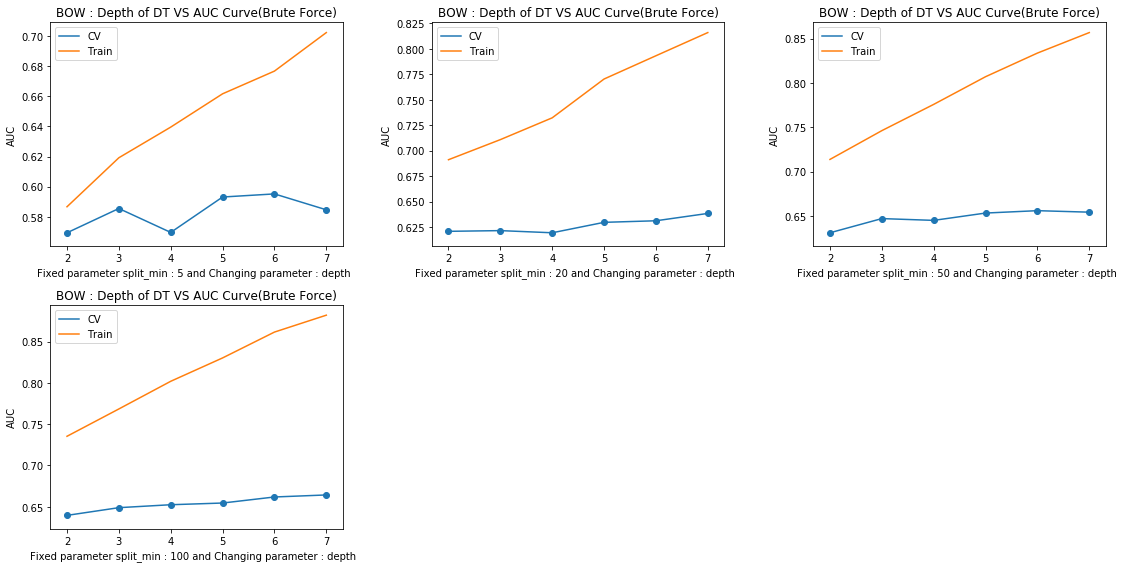

In [66]:
from sklearn.ensemble import RandomForestClassifier
Dictionay_cv = dict()
Dictionay_train = dict()
count = 0
depth_max  = [i for i in [2,3,4,5,6,7]]
n_estimator = [i for i in [5,20,50,100]]
plt.figure(figsize=(16,8))
for i in tqdm(n_estimator):
    Dictionay_cv = dict()
    Dictionay_train = dict()
    for j in tqdm(depth_max):
        RandomForestClf= RandomForestClassifier(n_estimators= i , max_depth=j, random_state=0 ,class_weight = 'balanced')
        RandomForestClf.fit(X_vector_BOW_train,y_final_train)
        # Train Prediction
        prediction_train = RandomForestClf.predict_proba(X_vector_BOW_train)
        fpr, tpr, thresholds= roc_curve(y_final_train,prediction_train[:,1])
        AUC_train = auc(fpr,tpr)
        # CV Prediction
        prediction_cv = RandomForestClf.predict_proba(X_vector_BOW_cv)
        fpr, tpr, thresholds= roc_curve(y_cv,prediction_cv[:,1])
        AUC_cv = auc(fpr,tpr)

        # DIctionay updation for cv and train dataset
        Dictionay_cv.update({j:AUC_cv})
        Dictionay_train.update({j:AUC_train})
        Fixed_parm = i
        
    count+=1
    plt.subplot(2,3,count)
    plt.plot(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV')
    plt.plot(Dictionay_train.keys(),Dictionay_train.values(),label = 'Train')
    plt.title('BOW : Depth of DT VS AUC Curve(Brute Force)')
    plt.xlabel(f'Fixed parameter split_min : {Fixed_parm} and Changing parameter : depth  ')
    plt.ylabel('AUC')
    plt.scatter(Dictionay_cv.keys(),Dictionay_cv.values())
    plt.legend()

plt.tight_layout()
plt.show()  

In [156]:
Table_independent = []
Total_list = []
Table_independent.append('BOW')
Table_independent.append('Brute Force')
Table_independent.append(7)
Table_independent.append(200)
Table_independent.append('64%')
Total_list.append(Table_independent)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.74s/it]
No handles with labels found to put in legend.


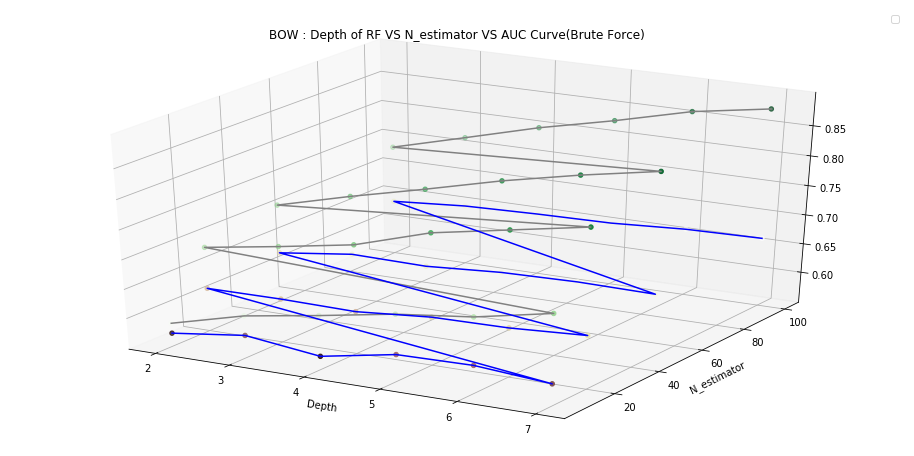

In [100]:
from mpl_toolkits.mplot3d import Axes3D
Dictionay_cv = dict()
Dictionay_train = dict()
count = 0
depth_max  = [i for i in [2,3,4,5,6,7]]
n_estimator = [i for i in [5,20,50,100]]

for i in tqdm(n_estimator):
    for j in tqdm(depth_max):
        RandomForestClf= RandomForestClassifier(n_estimators= i , max_depth=j, random_state=0 ,class_weight = 'balanced')
        RandomForestClf.fit(X_vector_BOW_train,y_final_train)
        # Train Prediction
        prediction_train = RandomForestClf.predict_proba(X_vector_BOW_train)
        fpr, tpr, thresholds= roc_curve(y_final_train,prediction_train[:,1])
        AUC_train = auc(fpr,tpr)
        # CV Prediction
        prediction_cv = RandomForestClf.predict_proba(X_vector_BOW_cv)
        fpr, tpr, thresholds= roc_curve(y_cv,prediction_cv[:,1])
        AUC_cv = auc(fpr,tpr)

        # DIctionay updation for cv and train dataset
        Dictionay_cv.update({count:[AUC_cv,i,j]})
        Dictionay_train.update({count:[AUC_train,i,j]})
        Fixed_parm = i
        count +=1
        
List_auc = []
List_n_estimator = []
List_depth=  []
List_dictValues = list(Dictionay_train.values())
for i in range(len(List_dictValues)):
    List_auc.append(List_dictValues[i][0])
    List_n_estimator.append(List_dictValues[i][1])
    List_depth.append(List_dictValues[i][2]) 
##############        CV         #################
List_auc_cv = []
List_n_estimator_cv = []
List_depth_cv =  []
List_dictValues_cv = list(Dictionay_cv.values())
for i in range(len(List_dictValues_cv)):
    List_auc_cv.append(List_dictValues_cv[i][0])
    List_n_estimator_cv.append(List_dictValues_cv[i][1])
    List_depth_cv.append(List_dictValues_cv[i][2]) 
    
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
ax.plot3D(List_depth, List_n_estimator, List_auc, 'gray')
ax.scatter3D(List_depth, List_n_estimator, List_auc, c=List_auc, cmap='Greens')

ax.plot3D(List_depth_cv, List_n_estimator_cv, List_auc_cv, 'blue')
ax.scatter3D(List_depth_cv, List_n_estimator_cv, List_auc_cv, c=List_auc_cv, cmap='pink')
# plt.plot(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV')
# plt.plot(Dictionay_train.keys(),Dictionay_train.values(),label = 'Train')
plt.title('BOW : Depth of RF VS N_estimator VS AUC Curve(Brute Force)')
plt.xlabel(f'Depth ')
plt.ylabel('N_estimator')
plt.legend()  

In [126]:
List_auc = []
List_n_estimator = []
List_depth=  []
List_dictValues = list(Dictionay_train.values())
for i in range(len(List_dictValues)):
    List_auc.append(List_dictValues[i][0])
    List_n_estimator.append(List_dictValues[i][1])
    List_depth.append(List_dictValues[i][2]) 
##############        CV         #################
List_auc_cv = []
List_n_estimator_cv = []
List_depth_cv =  []
List_dictValues_cv = list(Dictionay_cv.values())
for i in range(len(List_dictValues_cv)):
    List_auc_cv.append(List_dictValues_cv[i][0])
    List_n_estimator_cv.append(List_dictValues_cv[i][1])
    List_depth_cv.append(List_dictValues_cv[i][2]) 
Diction_train =  {'Depth': List_depth , 'N_estimator': List_n_estimator, 'AUC' : List_auc}
frame_train = pd.DataFrame(Diction_train)
Diction_cv =  {'Depth': List_depth_cv , 'N_estimator': List_n_estimator_cv, 'AUC' : List_auc_cv}
frame_cv = pd.DataFrame(Diction_cv)

In [129]:
frame_cv.tail()

Depth  N_estimator       AUC
19      3          100  0.648975
20      4          100  0.652531
21      5          100  0.654586
22      6          100  0.661901
23      7          100  0.664361

In [134]:
import plotly.express as px

fig = px.line_3d(frame_train, x='Depth', y='N_estimator', z='AUC')

fig.show()

fig = px.line_3d(frame_cv, x='Depth', y='N_estimator', z='AUC')

fig.show()

In [95]:
List_auc = []
List_n_estimator = []
List_depth=  []
List_dictValues = list(Dictionay_train.values())
for i in range(len(List_dictValues)):
    List_auc.append(List_dictValues[i][0])
    List_n_estimator.append(List_dictValues[i][1])
    List_depth.append(List_dictValues[i][2])    

[2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7]

the maximum value of tpr*(1-fpr) 0.4354405970285229 for threshold 0.499
the maximum value of tpr*(1-fpr) 0.3463008914326803 for threshold 0.501


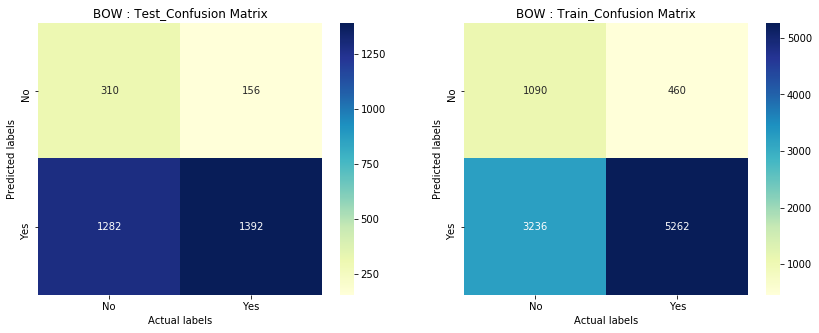

In [69]:
RandomForestClf= RandomForestClassifier(n_estimators= 50 , max_depth=2, random_state=0 ,class_weight = 'balanced')
RandomForestClf.fit(X_vector_BOW_train,y_final_train)

#Train
DecisionFunction_final_train = RandomForestClf.predict_proba(X_vector_BOW_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = RandomForestClf.predict_proba(X_vector_BOW_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('BOW : Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt = 'd'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('BOW : Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 2 ,min_samples_split  = 200,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_BOW_train,y_final_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
(Teacher_pre_hot_encoding_fitmodel_train, School_state_onehot_encoding_fitmodel_train,\
            project_subject_categories_onehot_encoding_fitmodel_train,\
            project_subject_subcategories_onehot_encoding_fitmodel_train,\
           Teacher_no_std_train,price_std_train,quantity_std_train,text_bow_essays_train,\
            text_bow_title_train))

In [73]:
graph = []
for i in Teacher_pre_hot_encoding.get_feature_names():
    graph.append(i)
for i in School_state_onehot_encoding.get_feature_names():
    graph.append(i)
for i in project_subject_categories_onehot_encoding.get_feature_names():
    graph.append(i)
for i in project_subject_subcategories_onehot_encoding.get_feature_names():
    graph.append(i)  
for i in ['teacher_number_of_previously_posted_projects','price','quantity']:
    graph.append(i)
for i in vectorizer_bow.get_feature_names():
    graph.append(i)
for i in vectorizer1_bow.get_feature_names():
    graph.append(i)    
len(graph)

9472

In [76]:
X_vector_BOW_train.shape

(69918, 9472)

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [79]:
from sklearn import tree
with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(DecisionTree_Classifier,filled=True, out_file=f,feature_names=graph)

<li>Decision tree diagram for BOW_BruteForce 
        <img src='BOW_BruteForce.png' width=2000px>

<h4>2 Find the best hyper paramter using k-fold cross validation or simple cross validation data</h4>

In [109]:
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import SCORERS
from sklearn.model_selection import StratifiedKFold
Dictionay_cv_cross_val = dict()
Dictionary_train = dict()
list3 = [4,5,6,7,8]
for k in tqdm(list3):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = k ,min_samples_split  = 200,class_weight='balanced')
    strfied_k_fold = StratifiedKFold(n_splits = 5,random_state=4)
    scores = cross_validate(DecisionTree_Classifier, X_vector_BOW_train, y_final_train, cv=strfied_k_fold, scoring='roc_auc',return_train_score=True)
    #CV
    mean_AUC_cv = np.mean(scores['test_score'])
    Dictionay_cv_cross_val.update({k:mean_AUC_cv})
    #train
    mean_AUC_train = np.mean(scores['train_score'])
    Dictionary_train.update({k:mean_AUC_train})

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:42<00:00, 22.13s/it]


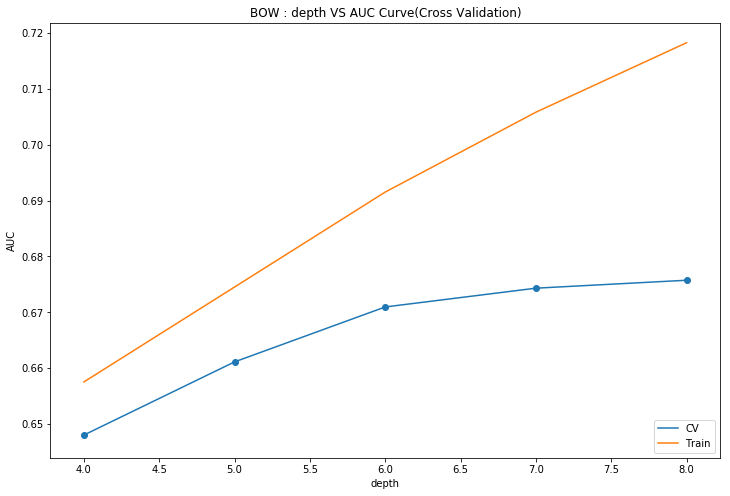

In [110]:
plt.figure(figsize=(12,8))
plt.plot(Dictionay_cv_cross_val.keys(),Dictionay_cv_cross_val.values(),label='CV')
plt.plot(Dictionary_train.keys(),Dictionary_train.values(),label='Train')
plt.title('BOW : depth VS AUC Curve(Cross Validation)')
plt.xlabel('depth')
plt.scatter(Dictionay_cv_cross_val.keys(),Dictionay_cv_cross_val.values())
plt.ylabel('AUC')

plt.legend(loc = 'lower right')
plt.show()

In [157]:
Table_independent = []
Table_independent.append('BOW')
Table_independent.append('Stratified_k_fold')
Table_independent.append(7)
Table_independent.append(200)
Table_independent.append('67')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.4214858364434036 for threshold 0.494
the maximum value of tpr*(1-fpr) 0.37939597333782155 for threshold 0.388


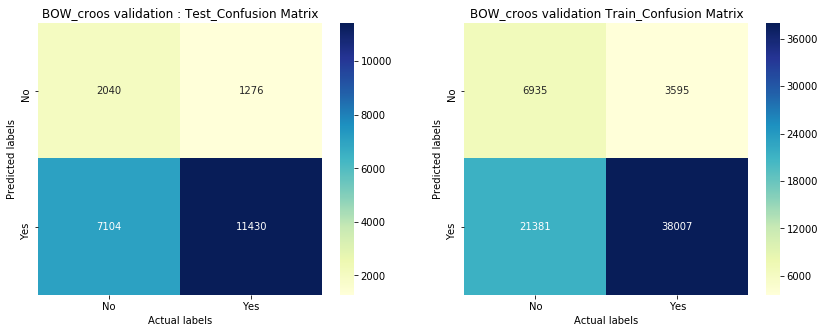

In [115]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 200,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_BOW_train,y_final_train)

#Train
DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_BOW_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_BOW_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)


#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt = 'd'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('BOW_croos validation : Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('BOW_croos validation Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

In [81]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 2 ,min_samples_split  = 200,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_BOW_train,y_final_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
with open("BOW_cross_validation.txt", "w") as f:
    f = tree.export_graphviz(DecisionTree_Classifier,filled=True, out_file=f,feature_names=graph)

<li>Decision tree diagram for BOW_cross_validation 
        <img src='BOW_BruteForce.png' width=2000px>

<h3>3 Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
</h3>

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
list3 = [4,5,6,7,8]
list4 = [100,200,500,1000,2000,3000]
parameters = {'max_depth':list3 , 
              'min_samples_split': list4 }
Dictionay_train_random = dict()
 #########################################################################################  
DecisionTree_Classifier = DecisionTreeClassifier(class_weight='balanced')
random_validation = RandomizedSearchCV(DecisionTree_Classifier,parameters, cv=3, scoring='roc_auc',return_train_score=True)
random_validation.fit(X_vector_BOW_train,y_final_train)

AUC_Means_Score_train = random_validation.cv_results_['mean_train_score']
AUC_Means_Score_cv = random_validation.cv_results_['mean_test_score']

Dictionay_cv_cross_val = dict()
for i in range(0,len(AUC_Means_Score_cv)):
    Dictionay_cv_cross_val.update({i: AUC_Means_Score_cv[i]})
for i in range(0,len(AUC_Means_Score_train)):
    Dictionay_train_random.update({i: AUC_Means_Score_train[i]}) 

In [160]:
random_validation.cv_results_

{'mean_fit_time': array([3.19759258, 1.55589477, 1.49313529, 2.17983437, 1.28406326,
        5.42023063, 7.92351524, 1.5066456 , 2.37787867, 1.23885671]),
 'std_fit_time': array([0.19450057, 0.0141513 , 0.04233108, 0.10863294, 0.05274321,
        0.61577798, 1.3683815 , 0.03759391, 0.06247107, 0.09588228]),
 'mean_score_time': array([0.09141199, 0.08643659, 0.08454911, 0.09143559, 0.0884397 ,
        0.17718442, 0.15903815, 0.09384847, 0.0963792 , 0.08456405]),
 'std_score_time': array([0.00598712, 0.00169381, 0.00483826, 0.01379036, 0.00373794,
        0.00368077, 0.04618186, 0.0016439 , 0.00933824, 0.00457085]),
 'param_min_samples_split': masked_array(data=[200, 500, 1000, 2000, 3000, 500, 200, 2000, 200, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[7, 5, 5, 8, 5, 7, 8, 5, 6, 4],
              mask=[False, False, False, Fa

No handles with labels found to put in legend.


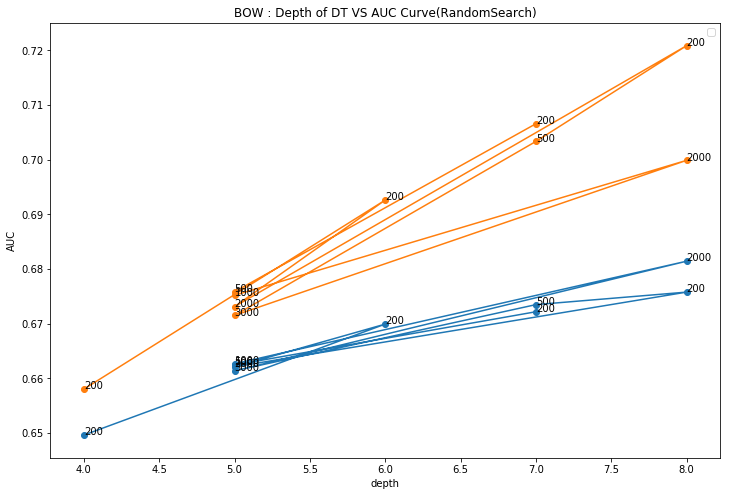

In [166]:

Params_list_depth = []
Params_list_sample_splits = []

for i in range(0,10):
    Params_list_depth.append(random_validation.cv_results_['params'][i]['max_depth'])
    
for i in range(0,10):
    Params_list_sample_splits.append(random_validation.cv_results_['params'][i]['min_samples_split'])    
                      
plt.figure(figsize=(12,8)) 

plt.plot(Params_list_depth,random_validation.cv_results_['mean_test_score'])

plt.plot(Params_list_depth,random_validation.cv_results_['mean_train_score'])

plt.title('BOW : Depth of DT VS AUC Curve(RandomSearch)')
plt.xlabel(f'depth')
plt.ylabel('AUC')
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_test_score'])
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_train_score'])
for i in range(0,10):
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_train_score'][i]))
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_test_score'][i]))
plt.legend()
plt.show()

In [159]:
#Params_list_depth
Params_list_sample_splits

[200, 500, 1000, 2000, 3000, 500, 200, 2000, 200, 200]

In [158]:
Table_independent = []
Table_independent.append('BOW')
Table_independent.append('RandomizerSearch_cv')
Table_independent.append(8)
Table_independent.append(2000)
Table_independent.append('68%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.4221149760478694 for threshold 0.486
the maximum value of tpr*(1-fpr) 0.38077602106544833 for threshold 0.38


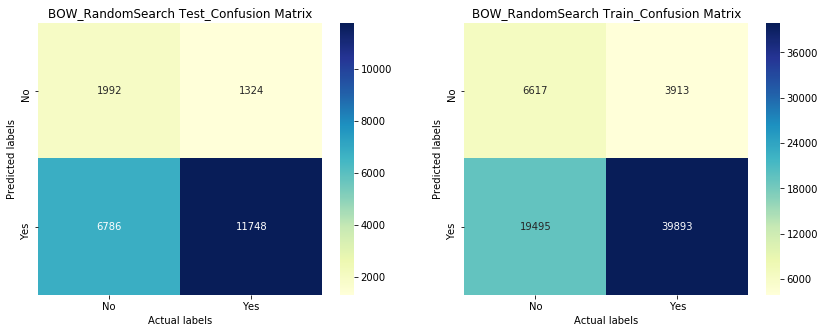

In [162]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 8 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_BOW_train,y_final_train)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_BOW_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_BOW_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('BOW_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('BOW_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 2 ,min_samples_split  = 1000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_BOW_train,y_final_train)
from sklearn import tree
with open("BOW_RandomSearch.txt", "w") as f:
    f = tree.export_graphviz(DecisionTree_Classifier,filled=True, out_file=f,feature_names=graph)


<li>Decision tree diagram for BOW_BruteForce 
        <img src='BOW_BruteForce.png' width=2000px>

<h3>Representation fo BOW Model</h3>
<h4>ROC Curve for BOW</h4>

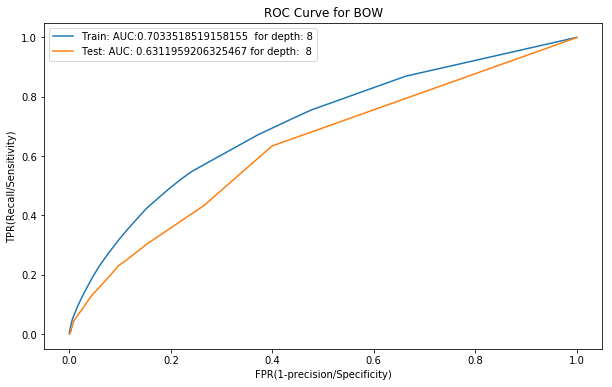

In [246]:
#from sklearn.metrics import roc_curve,roc_auc_score,auc
#.005
from sklearn.tree import DecisionTreeClassifier
max_depth = 8
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = max_depth ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_BOW_train,y_final_train)
#Train
DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_BOW_train)
preds_final_train = DecisionFunction_final_train[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,preds_final_train)
roc_auc_final_train = auc(fpr_train, tpr_train)

#Test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_BOW_test)
preds_final_test = DecisionFunction_final_test[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,preds_final_test)
roc_auc_final_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10,6))
plt.plot(fpr_train,tpr_train,label=f'Train: AUC:{roc_auc_final_train}  for depth: {max_depth}')
plt.plot(fpr_test,tpr_test,label=f'Test: AUC: {roc_auc_final_test} for depth:  {max_depth}')
plt.xlabel('FPR(1-precision/Specificity)')
plt.ylabel('TPR(Recall/Sensitivity)')
plt.title('ROC Curve for BOW')
plt.legend()
plt.show()

In [247]:
DecisionTree_Classifier.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

<h4>Confusion Matrix</h4>

the maximum value of tpr*(1-fpr) 0.38077602106544833 for threshold 0.38


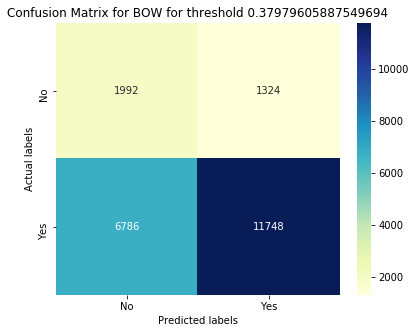

In [49]:
#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_BOW_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title(f'Confusion Matrix for BOW for threshold {threshold_test}')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show()

In [259]:
tn, fp, fn, tp = cm_test.ravel()
fn

6786

#### Finding False Positive Data Points and creating word cloud

In [50]:
#(y_test,prediction_test)

#X_test[y_test==0]
y_pred = pd.Series(prediction_test)
Test_title = pd.Series(preprocessed_title_test)
#y_pred[:].T
y_pred = y_pred.reset_index(drop=True)
Test_title_1 = Test_title.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP = Test_title_1[(y_test_1 == 0) & (y_pred == 1)]
#X_test[y_test != y_pred]
FP_list = FP.tolist()

In [51]:
vectorizer1_bow.get_feature_names()[:5]

['000', '04', '05', '10', '10 prize']

100%|██████████████████████████████████████████████████████████████████████████| 1324/1324 [00:00<00:00, 142929.98it/s]


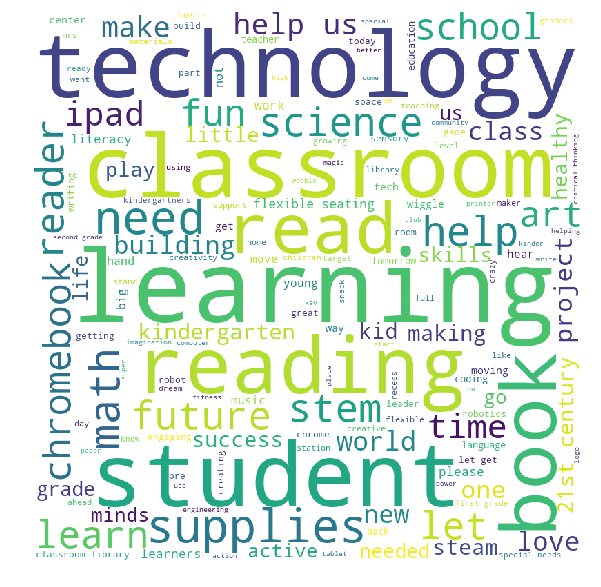

In [52]:
from wordcloud import WordCloud
# Converts each token into lowercase 
comment_words = ' '
for i in tqdm(range(len(FP_list))): 
    FP_list[i] = FP_list[i].lower() 
          
for words in tqdm(FP_list): 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Creating word cloud for Whole Title Words for comparison for False Positive Words

In [296]:
#X_test[y_test==0]
y_pred = pd.Series(prediction_test)
Test_title = pd.Series(preprocessed_title_test)
#y_pred[:].T
y_pred = y_pred.reset_index(drop=True)
X_test_1 = X_test.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP = X_test_1[(y_test_1 == 0) & (y_pred == 1)]
#X_test[y_test != y_pred]


100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:01<00:00, 11103.82it/s]


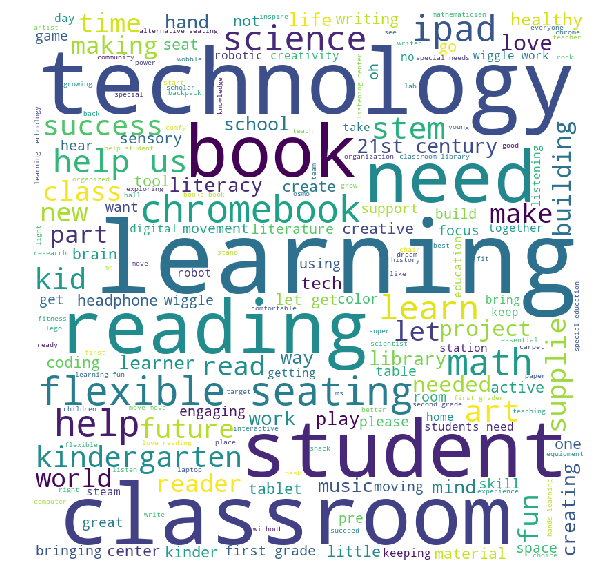

In [299]:
from wordcloud import WordCloud
# Converts each token into lowercase 
comment_words = ' '
for i in tqdm(range(len(preprocessed_title_test))): 
    preprocessed_title_test[i] = preprocessed_title_test[i].lower() 
          
for words in tqdm(preprocessed_title_test): 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Plot the box plot with the `price` of these `false positive data points'

In [77]:
y_pred = pd.Series(prediction_test)

y_pred = y_pred.reset_index(drop=True)
X_final_train_1 = X_final_train.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP_price = X_test[(y_test_1 == 0) & (y_pred == 1)]

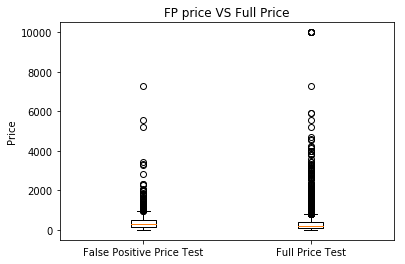

In [82]:
X_price = X_test['price'].reset_index(drop = True)
X_price_FP = FP_price['price'].reset_index(drop = True)
plt.boxplot([X_price_FP,X_price])
plt.ylabel("Price")
plt.title("FP price VS Full Price")
plt.xticks([1,2],["False Positive Price Test","Full Price Test"])
plt.show()

#### Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

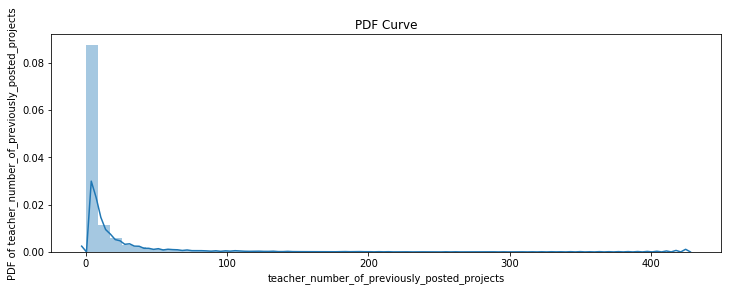

In [91]:
teacher_project = X_test['teacher_number_of_previously_posted_projects']
fig = plt.figure(figsize=(12,4))
sns.distplot(teacher_project)
plt.ylabel('PDF of teacher_number_of_previously_posted_projects')
plt.title('PDF Curve')
plt.show()

### 2.4.2 Applying DT on TFIDF,<font color='red'> SET 2</font>

In [94]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_vector_tfidf_train = hstack((Teacher_pre_hot_encoding_fitmodel_train, School_state_onehot_encoding_fitmodel_train,\
            project_subject_categories_onehot_encoding_fitmodel_train,\
            project_subject_subcategories_onehot_encoding_fitmodel_train,\
           Teacher_no_std_train,price_std_train,quantity_std_train,text_tfidf_essays_train,\
            text_tfidf_title_train))

X_vector_tfidf_cv = hstack((Teacher_pre_hot_encoding_fitmodel_cv, School_state_onehot_encoding_fitmodel_cv,\
            project_subject_categories_onehot_encoding_fitmodel_cv,\
            project_subject_subcategories_onehot_encoding_fitmodel_cv,\
           Teacher_no_std_cv,price_std_cv,quantity_std_cv,text_tfidf_essays_cv,\
            text_tfidf_title_cv))


X_vector_tfidf_test = hstack((Teacher_pre_hot_encoding_fitmodel_test, School_state_onehot_encoding_fitmodel_test,\
            project_subject_categories_onehot_encoding_fitmodel_test,\
            project_subject_subcategories_onehot_encoding_fitmodel_test,\
           Teacher_no_std_test,price_std_test,quantity_std_test,text_tfidf_essays_test,\
            text_tfidf_title_test))

<h4>2.Hyperparameter tuning (Brute Force)</h4>


In [185]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
list1=[]
Dictionay_cv = dict()
Dictionay_train = dict()
list2 = [5,6,7,8,15,20,25,30]
list4 = [100,200,500,1000,2000,3000]
for i in tqdm(list2):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = i ,min_samples_split  = 2000,class_weight='balanced')
    DecisionTree_Classifier.fit(X_vector_tfidf_train,y_final_train)
    # Train Prediction
    Decision_function_train_log = DecisionTree_Classifier.predict_proba(X_vector_tfidf_train)
    preds = Decision_function_train_log[:,1]
    fpr, tpr, thresholds= roc_curve(y_final_train,preds)
    AUC_train = auc(fpr,tpr)
    # CV Prediction
    prediction_cv_log = DecisionTree_Classifier.predict_proba(X_vector_tfidf_cv)
    preds = prediction_cv_log[:,1]
    fpr, tpr, thresholds= roc_curve(y_cv,preds)
    AUC_cv = auc(fpr,tpr)
    
    # DIctionay updation for cv and train dataset
    Dictionay_cv.update({i:AUC_cv})
    Dictionay_train.update({i:AUC_train})


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [03:38<00:00, 34.60s/it]


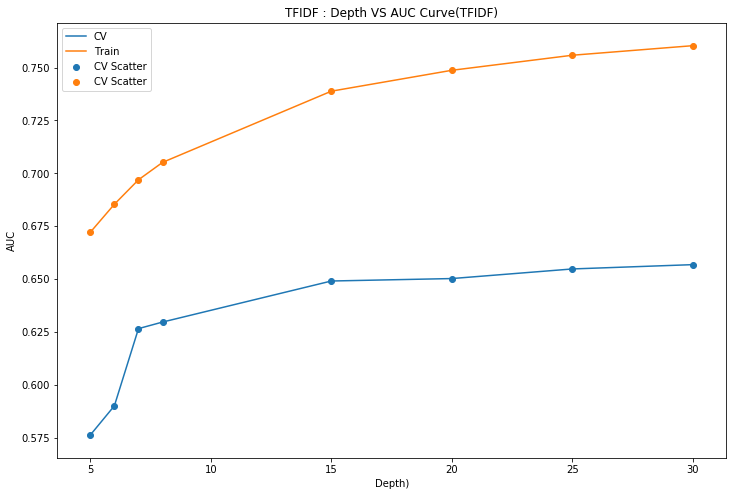

In [186]:
plt.figure(figsize=(12,8))   
plt.plot(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV')
plt.plot(Dictionay_train.keys(),Dictionay_train.values(),label = 'Train')
plt.title('TFIDF : Depth VS AUC Curve(TFIDF)')
plt.xlabel('Depth)')
plt.ylabel('AUC')
plt.scatter(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV Scatter')
plt.scatter(Dictionay_train.keys(),Dictionay_train.values(),label = 'CV Scatter')
plt.legend()
plt.show()    

In [159]:
Table_independent = []
Table_independent.append('TFIDF')
Table_independent.append('Brute Force')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('62%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.41802055227326324 for threshold 0.495
the maximum value of tpr*(1-fpr) 0.3793224606086971 for threshold 0.357


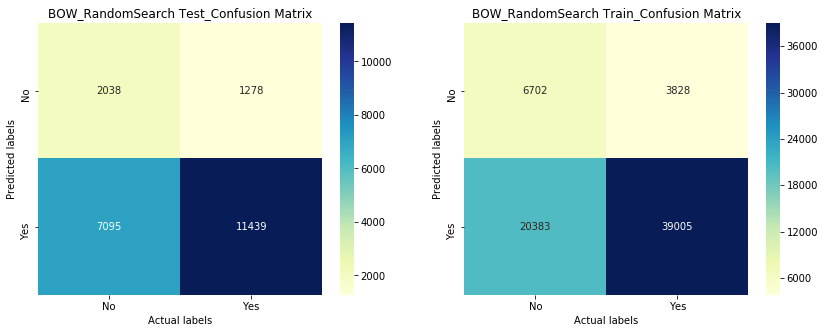

In [187]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_train,y_final_train)


DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_tfidf_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecsionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecsionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecsionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('BOW_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('BOW_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

In [66]:
graph2 = []
for i in Teacher_pre_hot_encoding.get_feature_names():
    graph2.append(i)
for i in School_state_onehot_encoding.get_feature_names():
    graph2.append(i)
for i in project_subject_categories_onehot_encoding.get_feature_names():
    graph2.append(i)
for i in project_subject_subcategories_onehot_encoding.get_feature_names():
    graph2.append(i)  
for i in ['teacher_number_of_previously_posted_projects','price','quantity']:
    graph2.append(i)
for i in vectorizer_tfidf.get_feature_names():
    graph2.append(i)
for i in vectorizer1_tfidf.get_feature_names():
    graph2.append(i)    
len(graph2)

6098

In [96]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 2 ,min_samples_split  = 20000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_train,y_final_train)
from sklearn import tree
with open("TFIDF_brute_force.txt", "w") as f:
    f = tree.export_graphviz(DecisionTree_Classifier,filled=True, out_file=f,feature_names=graph2)

<li>Decision tree diagram for BOW_BruteForce 
        <img src='BOW_BruteForce.png' width=2000px>

<h4>2 Find the best hyper paramter using k-fold cross validation or simple cross validation data</h4>

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
from sklearn.model_selection import StratifiedKFold
Dictionary_cv_cross_val = dict()
Dictionary_train= dict()
list3 = [4,5,6,7,8,15,25]
list4 = [100,200,500,1000,2000,3000]
for k in tqdm(list3):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = k ,min_samples_split  = 2000,class_weight='balanced')
    strfied_k_fold = StratifiedKFold(n_splits = 5,random_state=4)
    scores = cross_validate(DecisionTree_Classifier, X_vector_tfidf_train, y_final_train, cv=strfied_k_fold, scoring='roc_auc',return_train_score=True)
    #CV
    mean_AUC_cv = np.mean(scores['test_score'])
    Dictionary_cv_cross_val.update({k:mean_AUC_cv})
    #train
    mean_AUC_train = np.mean(scores['train_score'])
    Dictionary_train.update({k:mean_AUC_train})

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [09:07<00:00, 96.02s/it]


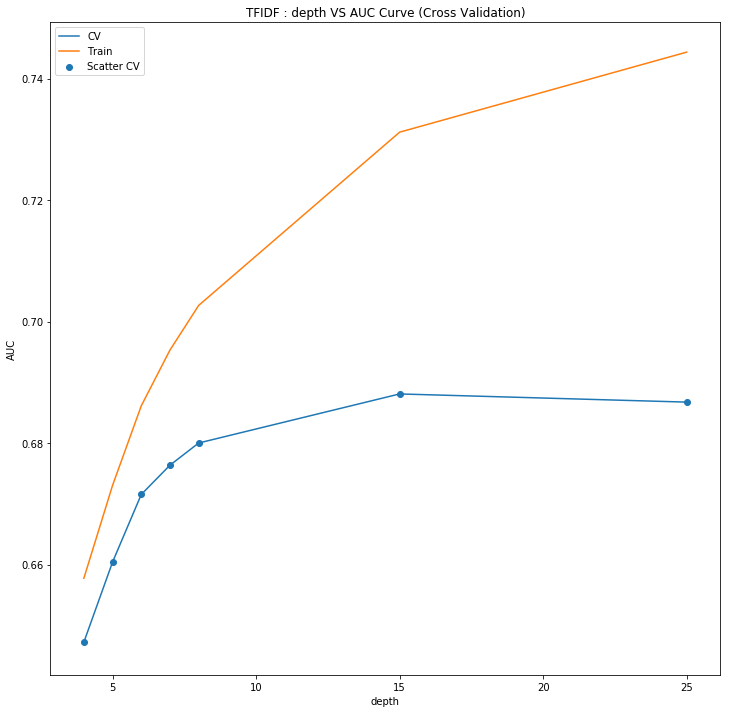

In [191]:
plt.figure(figsize=(12,12))
plt.plot(Dictionary_cv_cross_val.keys(),Dictionary_cv_cross_val.values(),label='CV')
plt.plot(Dictionary_train.keys(),Dictionary_train.values(),label='Train')
plt.scatter(Dictionary_cv_cross_val.keys(),Dictionary_cv_cross_val.values(),label='Scatter CV')
plt.title('TFIDF : depth VS AUC Curve (Cross Validation)')
plt.xlabel('depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [160]:
Table_independent = []
Table_independent.append('TFIDF')
Table_independent.append('Stratified_k_fold')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('68%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.41802055227326324 for threshold 0.495
the maximum value of tpr*(1-fpr) 0.3793224606086971 for threshold 0.357


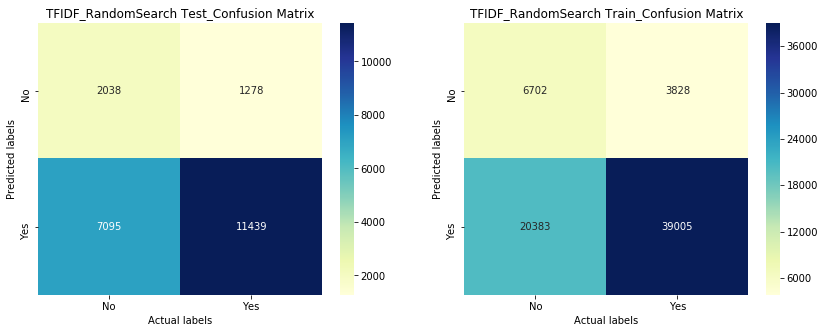

In [193]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_train,y_final_train)

#train
DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_tfidf_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('TFIDF_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('TFIDF_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

In [100]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 3 ,min_samples_split  = 200,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_train,y_final_train)
from sklearn import tree
with open("TFIDF_CV.txt", "w") as f:
    f = tree.export_graphviz(DecisionTree_Classifier,filled=True, out_file=f,feature_names=graph2)

<li>Decision tree diagram for BOW_BruteForce 
        <img src='TFIDF_cv.png' width=2000px>

<h4>Random Search</h4>

In [194]:
from sklearn.model_selection import RandomizedSearchCV
list3 = [4,5,6,7,8]
list4 = [100,200,500,1000,2000,3000]
parameters = {'max_depth':list3,'min_samples_split':list4}
Dictionay_train_random = dict()
Dictionay_cv_cross_val = dict()
 #########################################################################################  
DecisionTree_Classifier = DecisionTreeClassifier(class_weight='balanced')
random_validation = RandomizedSearchCV(DecisionTree_Classifier,parameters, cv=3, scoring='roc_auc',return_train_score=True)
random_validation.fit(X_vector_tfidf_train,y_final_train)

AUC_Means_Score_train = random_validation.cv_results_['mean_train_score']
AUC_Means_Score_cv = random_validation.cv_results_['mean_test_score']

Dictionay_cv_cross_val = dict()
for i in range(0,len(AUC_Means_Score_cv)):
    Dictionay_cv_cross_val.update({i: AUC_Means_Score_cv[i]})
for i in range(0,len(AUC_Means_Score_train)):
    Dictionay_train_random.update({i: AUC_Means_Score_train[i]}) 
    

No handles with labels found to put in legend.


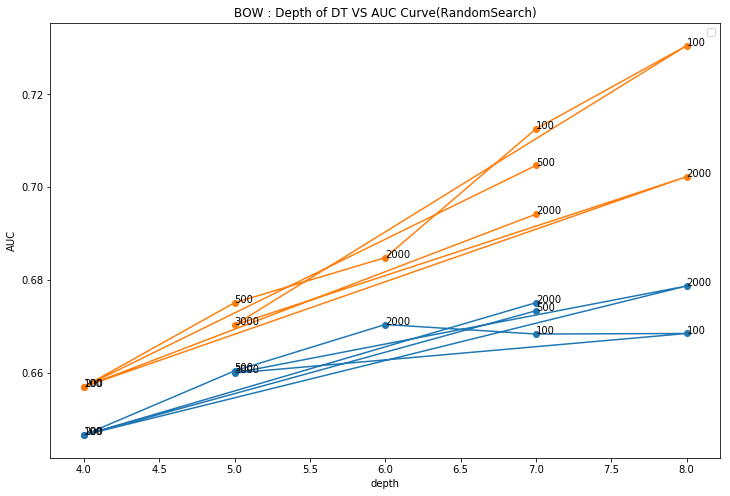

In [195]:

Params_list_depth = []
Params_list_sample_splits = []

for i in range(0,10):
    Params_list_depth.append(random_validation.cv_results_['params'][i]['max_depth'])
    
for i in range(0,10):
    Params_list_sample_splits.append(random_validation.cv_results_['params'][i]['min_samples_split'])    
                      
plt.figure(figsize=(12,8)) 

plt.plot(Params_list_depth,random_validation.cv_results_['mean_test_score'])

plt.plot(Params_list_depth,random_validation.cv_results_['mean_train_score'])

plt.title('BOW : Depth of DT VS AUC Curve(RandomSearch)')
plt.xlabel(f'depth')
plt.ylabel('AUC')
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_test_score'])
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_train_score'])
for i in range(0,10):
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_train_score'][i]))
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_test_score'][i]))
plt.legend()
plt.show()

In [161]:
Table_independent = []
Table_independent.append('TFIDF')
Table_independent.append('RandomizerSearch_cv')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('68%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.41802055227326324 for threshold 0.495
the maximum value of tpr*(1-fpr) 0.3793224606086971 for threshold 0.357


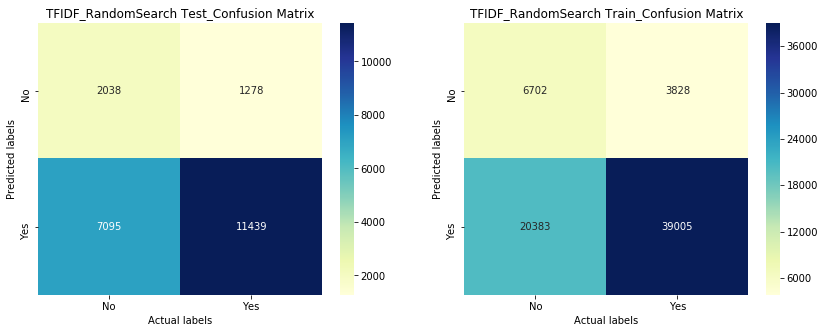

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_train,y_final_train)

#Train
DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_tfidf_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#Test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('TFIDF_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('TFIDF_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

<h3>Representatin of TFIDF model</h3>
<h4>ROC Curve for TFIDF Model</h4>

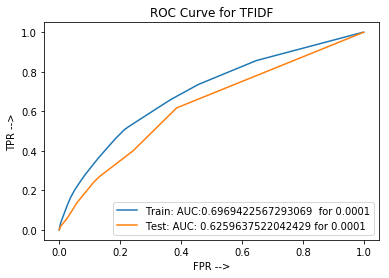

In [95]:
alpha = 10**-4
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_train,y_final_train)
#Train
probs_final_train = DecisionTree_Classifier.predict_proba(X_vector_tfidf_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,probs_final_train[:,1])
roc_auc_final_train = auc(fpr_train, tpr_train)
#Test
probs_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,probs_final_test[:,1])
roc_auc_final_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train,tpr_train,label=f'Train: AUC:{roc_auc_final_train}  for {alpha}')
plt.plot(fpr_test,tpr_test,label=f'Test: AUC: {roc_auc_final_test} for {alpha}')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.title('ROC Curve for TFIDF')
plt.legend()
plt.show()

<h4>Confusion Metrix</h4>

the maximum value of tpr*(1-fpr) 0.3793224606086971 for threshold 0.357


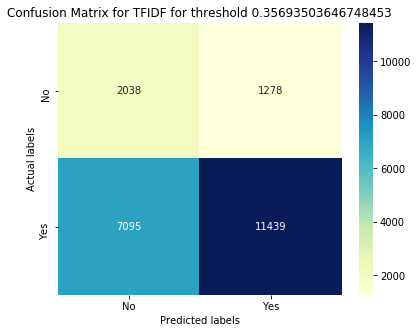

In [96]:
#############  optimized threshold confusion metrix #################
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title(f'Confusion Matrix for TFIDF for threshold {threshold_test}')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show()

#### Finding False Positive Data Points and creating word cloud

In [98]:
y_pred = pd.Series(prediction_test)
Test_title = pd.Series(preprocessed_title_test)
#y_pred[:].T
y_pred = y_pred.reset_index(drop=True)
Test_title_1 = Test_title.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP = Test_title_1[(y_test_1 == 0) & (y_pred == 1)]
#X_test[y_test != y_pred]
FP_list = FP.tolist()

100%|██████████████████████████████████████████████████████████████████████████| 1278/1278 [00:00<00:00, 126787.47it/s]


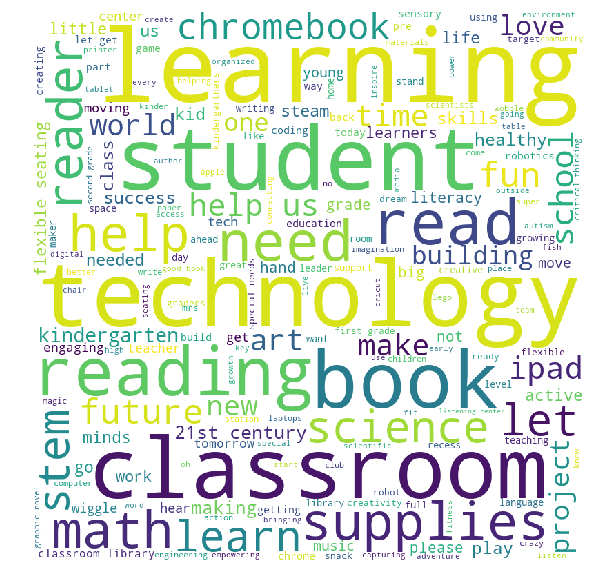

In [99]:
from wordcloud import WordCloud

comment_words = ' '
for i in tqdm(range(len(FP_list))): 
    FP_list[i] = FP_list[i].lower() 
          
for words in tqdm(FP_list): 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

#### Creating word cloud for Whole Title Words for comparison for False Positive Words

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 25504.63it/s]


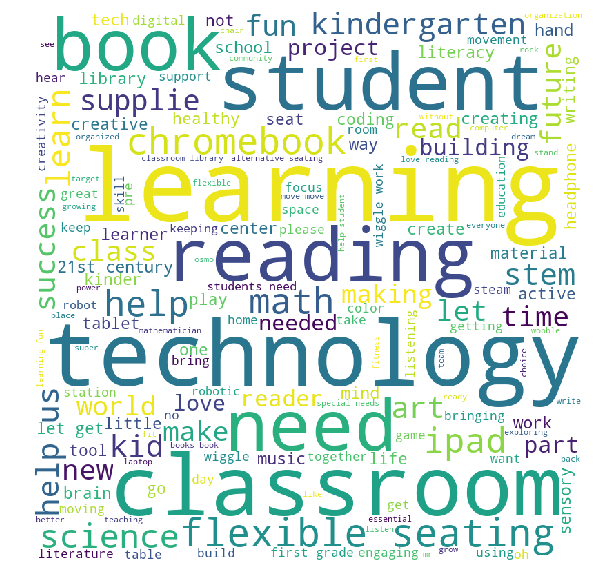

In [100]:
from wordcloud import WordCloud
# Converts each token into lowercase 
comment_words = ' '
for i in tqdm(range(len(preprocessed_title_test))): 
    preprocessed_title_test[i] = preprocessed_title_test[i].lower() 
          
for words in tqdm(preprocessed_title_test): 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Plot the box plot with the `price` of these `false positive data points'

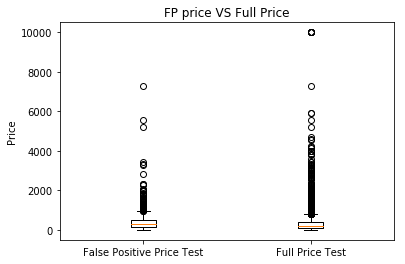

In [103]:
y_pred = pd.Series(prediction_test)

y_pred = y_pred.reset_index(drop=True)
X_final_train_1 = X_final_train.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP_price = X_test[(y_test_1 == 0) & (y_pred == 1)]

X_price = X_test['price'].reset_index(drop = True)
X_price_FP = FP_price['price'].reset_index(drop = True)
plt.boxplot([X_price_FP,X_price])
plt.ylabel("Price")
plt.title("FP price VS Full Price")
plt.xticks([1,2],["False Positive Price Test","Full Price Test"])
plt.show()

#### Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

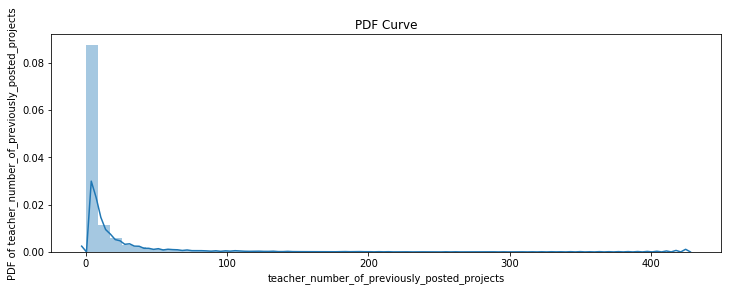

In [104]:
teacher_project = X_test['teacher_number_of_previously_posted_projects']
fig = plt.figure(figsize=(12,4))
sns.distplot(teacher_project)
plt.ylabel('PDF of teacher_number_of_previously_posted_projects')
plt.title('PDF Curve')
plt.show()

<h2>Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)</h2>

In [105]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_vector_avg_w2v_train = hstack((Teacher_pre_hot_encoding_fitmodel_train, School_state_onehot_encoding_fitmodel_train,\
            project_subject_categories_onehot_encoding_fitmodel_train,\
            project_subject_subcategories_onehot_encoding_fitmodel_train,\
           Teacher_no_std_train,price_std_train,quantity_std_train,avg_w2v_vectors_train,\
            avg_w2v_vectors_title_train))

X_vector_avg_w2v_cv = hstack((Teacher_pre_hot_encoding_fitmodel_cv, School_state_onehot_encoding_fitmodel_cv,\
            project_subject_categories_onehot_encoding_fitmodel_cv,\
            project_subject_subcategories_onehot_encoding_fitmodel_cv,\
           Teacher_no_std_cv,price_std_cv,quantity_std_cv,avg_w2v_vectors_cv,\
            avg_w2v_vectors_title_cv))


X_vector_avg_w2v_test = hstack((Teacher_pre_hot_encoding_fitmodel_test, School_state_onehot_encoding_fitmodel_test,\
            project_subject_categories_onehot_encoding_fitmodel_test,\
            project_subject_subcategories_onehot_encoding_fitmodel_test,\
           Teacher_no_std_test,price_std_test,quantity_std_test,avg_w2v_vectors_test,\
            avg_w2v_vectors_title_test))

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
list1=[]
Dictionay_cv = dict()
Dictionay_train = dict()
list3 = [4,5,6,7,8,15,25,35]
list4 = [100,200,500,1000,2000,3000]
for i in tqdm(list3):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = i ,min_samples_split  = 2000,class_weight='balanced')
    DecisionTree_Classifier.fit(X_vector_avg_w2v_train,y_final_train)
    # Train Prediction
    prediction_train_log = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_train)
    preds = prediction_train_log[:,1]
    fpr, tpr, thresholds= roc_curve(y_final_train,preds)
    AUC_train = auc(fpr,tpr)
    # CV Prediction
    prediction_cv_log = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_cv)
    preds = prediction_cv_log[:,1]
    fpr, tpr, thresholds= roc_curve(y_cv,preds)
    AUC_cv = auc(fpr,tpr)
    
    # DIctionay updation for cv and train dataset
    Dictionay_cv.update({i:AUC_cv})
    Dictionay_train.update({i:AUC_train})

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [06:31<00:00, 56.52s/it]


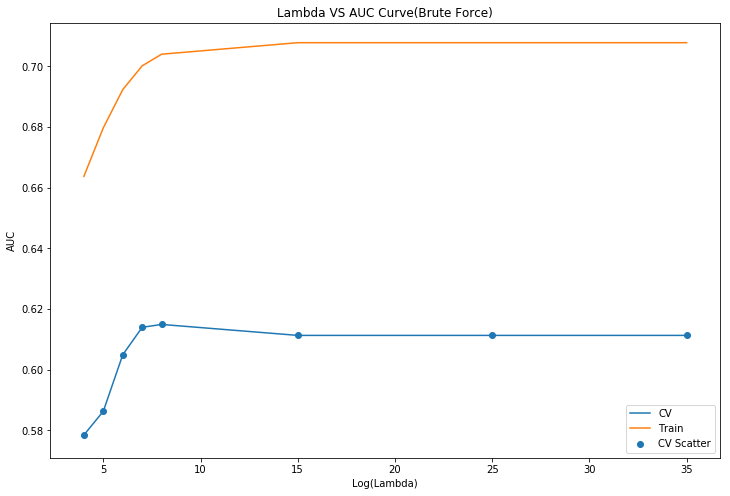

In [57]:
plt.figure(figsize=(12,8))   
plt.plot(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV')
plt.plot(Dictionay_train.keys(),Dictionay_train.values(),label = 'Train')
plt.title('Lambda VS AUC Curve(Brute Force)')
plt.xlabel('Log(Lambda)')
plt.ylabel('AUC')
plt.scatter(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV Scatter')
plt.legend()
plt.show() 

In [162]:
Table_independent = []
Table_independent.append('AVG_W2VEC')
Table_independent.append('Brute Force')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('62%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.41453577999232566 for threshold 0.498
the maximum value of tpr*(1-fpr) 0.3456401582173564 for threshold 0.371


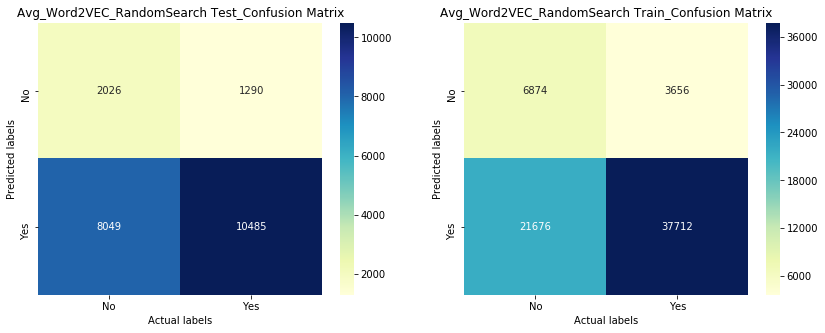

In [58]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_avg_w2v_train,y_final_train)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('Avg_Word2VEC_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('Avg_Word2VEC_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

<h4>2 Find the best hyper paramter using k-fold cross validation or simple cross validation data</h4>

In [61]:
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import SCORERS
from sklearn.model_selection import StratifiedKFold
Dictionay_cv_cross_val = dict()
Dictionay_train= dict()
list3 = [4,5,6,7,8]
list4 = [100,200,500,1000,2000,3000]
for k in tqdm(list3):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = k ,min_samples_split  = 2000,class_weight='balanced')
    strfied_k_fold = StratifiedKFold(n_splits = 3,random_state=4)
    scores = cross_validate(DecisionTree_Classifier, X_vector_avg_w2v_train, y_final_train, cv=strfied_k_fold, scoring='roc_auc',return_train_score=True)
    #CV
    mean_AUC_cv = np.mean(scores['test_score'])
    Dictionay_cv_cross_val.update({k:mean_AUC_cv})
    #train
    mean_AUC_train = np.mean(scores['train_score'])
    Dictionay_train.update({k:mean_AUC_train})

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:41<00:00, 69.55s/it]


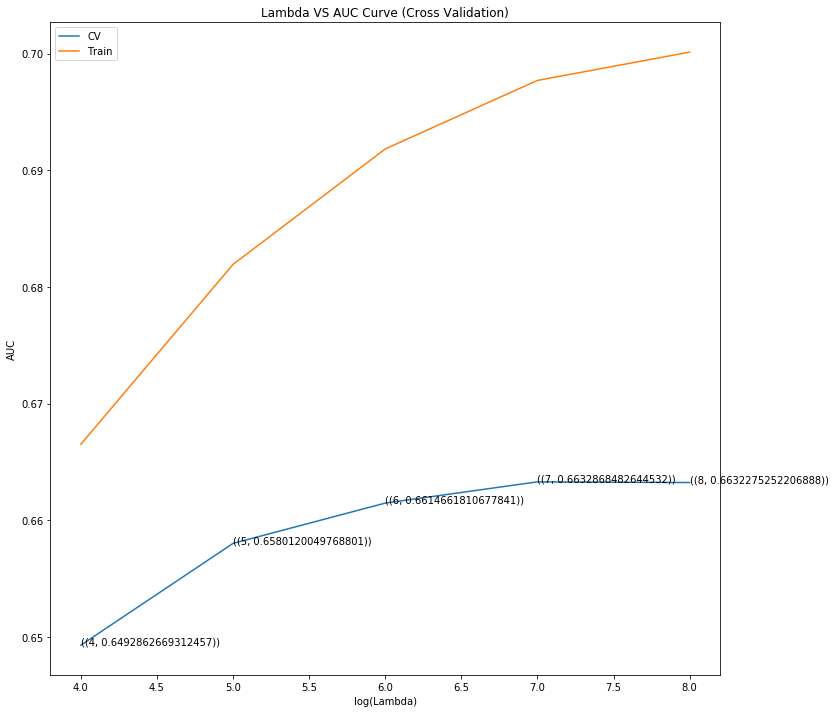

In [62]:
plt.figure(figsize=(12,12))
plt.plot(Dictionay_cv_cross_val.keys(),Dictionay_cv_cross_val.values(),label='CV')
plt.plot(Dictionay_train.keys(),Dictionay_train.values(),label='Train')
plt.title('Lambda VS AUC Curve (Cross Validation)')
plt.xlabel('log(Lambda)')
plt.ylabel('AUC')
plt.legend()
for key,value in Dictionay_cv_cross_val.items():
    plt.annotate(s=(f'({key,value})') , xy = (key,value),)
plt.show()

In [163]:
Table_independent = []
Table_independent.append('AVG_W2VEC')
Table_independent.append('Stratified_k_fold')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('66%')
Total_list.append(Table_independent)


the maximum value of tpr*(1-fpr) 0.41453577999232566 for threshold 0.498
the maximum value of tpr*(1-fpr) 0.3456401582173564 for threshold 0.371


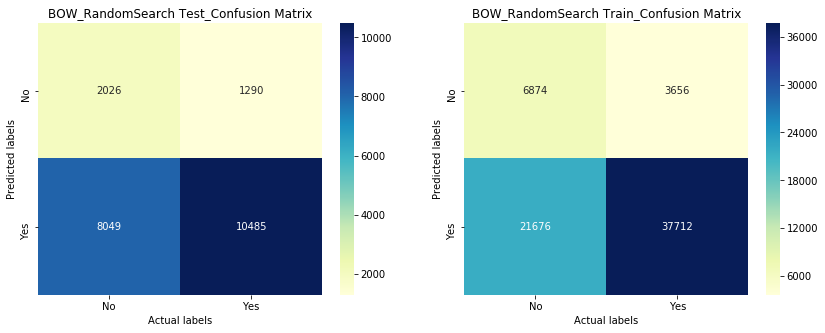

In [64]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_avg_w2v_train,y_final_train)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('BOW_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('BOW_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

<h4>Random Search</h4>

In [65]:
from sklearn.model_selection import RandomizedSearchCV
list3 = [4,5,6,7,8]
list4 = [100,200,500,1000,2000,3000]
parameters = {'max_depth':list3,'min_samples_split':list4}
Dictionay_train_random = dict()
Dictionay_cv_cross_val = dict()
    
#########################################################################################    
DecisionTree_Classifier = DecisionTreeClassifier(class_weight='balanced')
random_validation = RandomizedSearchCV(DecisionTree_Classifier,parameters, cv=3, scoring='roc_auc',return_train_score=True)
random_validation.fit(X_vector_avg_w2v_train,y_final_train)

AUC_Means_Score_train = random_validation.cv_results_['mean_train_score']
AUC_Means_Score_cv = random_validation.cv_results_['mean_test_score']

for i in range(0,len(AUC_Means_Score_cv)):
    Dictionay_cv_cross_val.update({i: AUC_Means_Score_cv[i]})
for i in range(0,len(AUC_Means_Score_train)):
    Dictionay_train_random.update({i: AUC_Means_Score_train[i]}) 

No handles with labels found to put in legend.


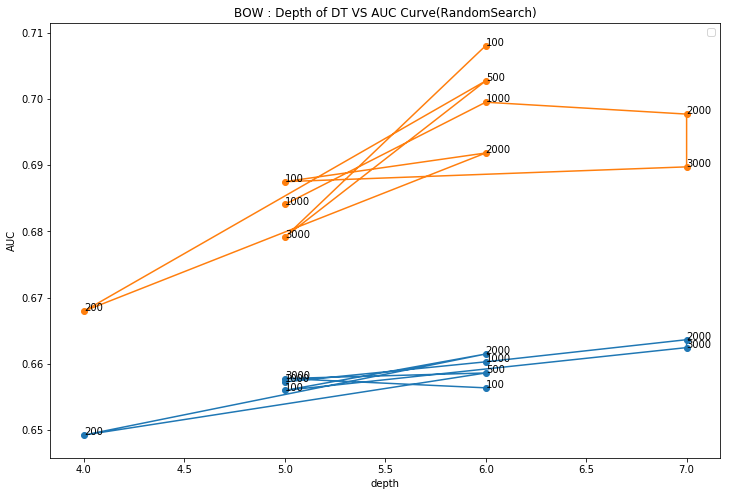

In [66]:

Params_list_depth = []
Params_list_sample_splits = []

for i in range(0,10):
    Params_list_depth.append(random_validation.cv_results_['params'][i]['max_depth'])
    
for i in range(0,10):
    Params_list_sample_splits.append(random_validation.cv_results_['params'][i]['min_samples_split'])    
                      
plt.figure(figsize=(12,8)) 

plt.plot(Params_list_depth,random_validation.cv_results_['mean_test_score'])

plt.plot(Params_list_depth,random_validation.cv_results_['mean_train_score'])

plt.title('BOW : Depth of DT VS AUC Curve(RandomSearch)')
plt.xlabel(f'depth')
plt.ylabel('AUC')
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_test_score'])
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_train_score'])
for i in range(0,10):
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_train_score'][i]))
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_test_score'][i]))
plt.legend()
plt.show()

In [164]:
Table_independent = []
Table_independent.append('AVG_W2VEC')
Table_independent.append('RandomizerSearch_cv')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('66')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.41453577999232566 for threshold 0.498
the maximum value of tpr*(1-fpr) 0.3456401582173564 for threshold 0.371


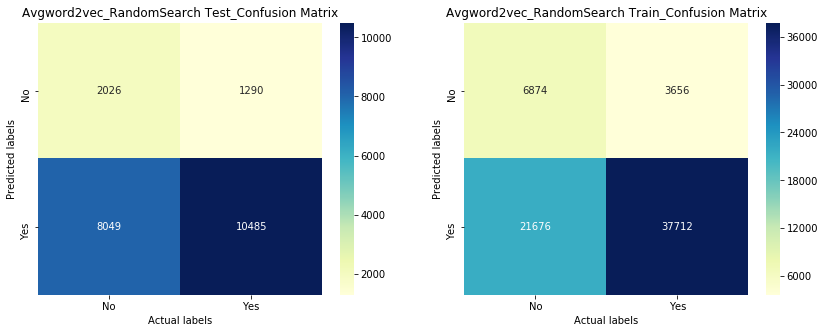

In [67]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_avg_w2v_train,y_final_train)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('Avgword2vec_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('Avgword2vec_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

<h3>Representatin of AvgWord2Vec model</h3>
<h4>ROC Curve for AvgWord2Vec Model</h4>

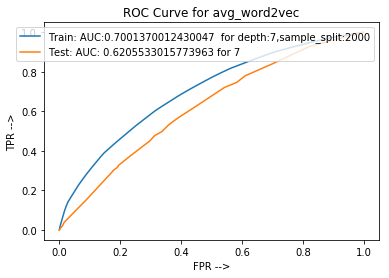

In [106]:
max_depth = 7
min_samples_split = 2000
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = max_depth ,min_samples_split = min_samples_split,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_avg_w2v_train,y_final_train)
#Train
probs_final_train = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,probs_final_train[:,1])
roc_auc_final_train = auc(fpr_train, tpr_train)
#Test
probs_final_test = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,probs_final_test[:,1])
roc_auc_final_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train,tpr_train,label=f'Train: AUC:{roc_auc_final_train}  for depth:{max_depth},sample_split:{min_samples_split}')
plt.plot(fpr_test,tpr_test,label=f'Test: AUC: {roc_auc_final_test} for {max_depth}')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.title('ROC Curve for avg_word2vec')
plt.legend()
plt.show()

<h4>Confusion Matrix AvgWrd2Vec</h4>

the maximum value of tpr*(1-fpr) 0.3456401582173564 for threshold 0.371


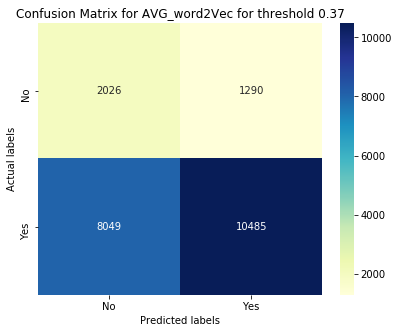

In [107]:
#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_avg_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
# labels, title and ticks
ax.set_ylabel('Actual labels')
ax.set_xlabel('Predicted labels') 
ax.set_title(f'Confusion Matrix for AVG_word2Vec for threshold {round(threshold_test,2)}')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show()

#### Finding False Positive Data Points and creating word cloud

In [109]:
y_pred = pd.Series(prediction_test)
Test_title = pd.Series(preprocessed_title_test)
#y_pred[:].T
y_pred = y_pred.reset_index(drop=True)
Test_title_1 = Test_title.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP = Test_title_1[(y_test_1 == 0) & (y_pred == 1)]
#X_test[y_test != y_pred]
FP_list = FP.tolist()

100%|███████████████████████████████████████████████████████████████████████████| 1290/1290 [00:00<00:00, 10575.20it/s]


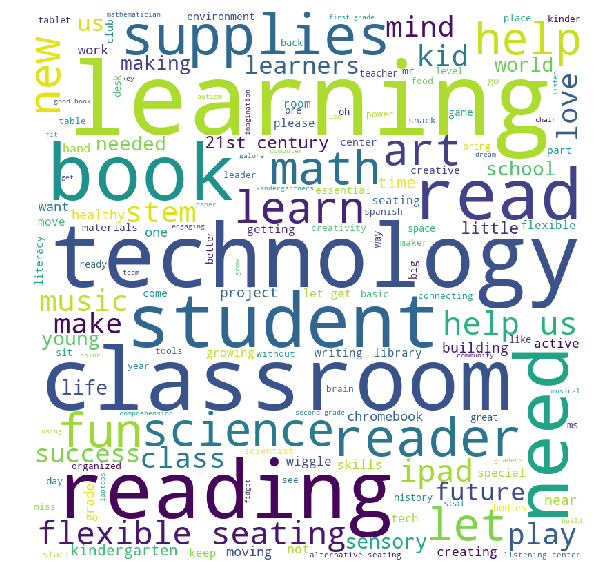

In [110]:
from wordcloud import WordCloud

comment_words = ' '
for i in tqdm(range(len(FP_list))): 
    FP_list[i] = FP_list[i].lower() 
          
for words in tqdm(FP_list): 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

#### Creating word cloud for Whole Title Words for comparison for False Positive Words

In [111]:
y_pred = pd.Series(prediction_test)
Test_title = pd.Series(preprocessed_title_test)
#y_pred[:].T
y_pred = y_pred.reset_index(drop=True)
X_test_1 = X_test.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP = X_test_1[(y_test_1 == 0) & (y_pred == 1)]
#X_test[y_test != y_pred]

plt.show()

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:01<00:00, 18620.78it/s]


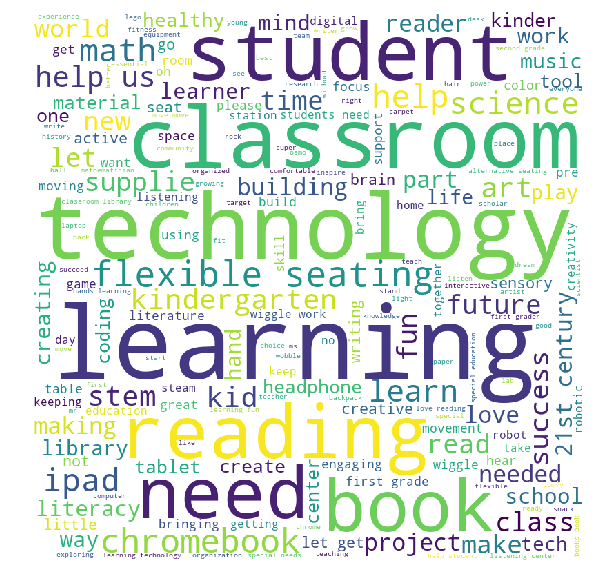

In [112]:
from wordcloud import WordCloud
# Converts each token into lowercase 
comment_words = ' '
for i in tqdm(range(len(preprocessed_title_test))): 
    preprocessed_title_test[i] = preprocessed_title_test[i].lower() 
          
for words in tqdm(preprocessed_title_test): 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Plot the box plot with the `price` of these `false positive data points'

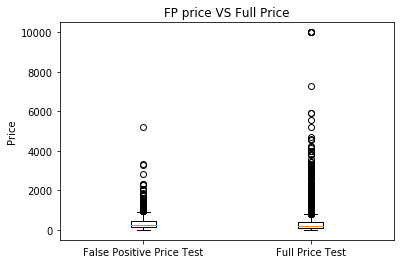

In [114]:

y_pred = pd.Series(prediction_test)

y_pred = y_pred.reset_index(drop=True)
X_final_train_1 = X_final_train.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP_price = X_test[(y_test_1 == 0) & (y_pred == 1)]



X_price = X_test['price'].reset_index(drop = True)
X_price_FP = FP_price['price'].reset_index(drop = True)
plt.boxplot([X_price_FP,X_price])
plt.ylabel("Price")
plt.title("FP price VS Full Price")
plt.xticks([1,2],["False Positive Price Test","Full Price Test"])
plt.show()

#### Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

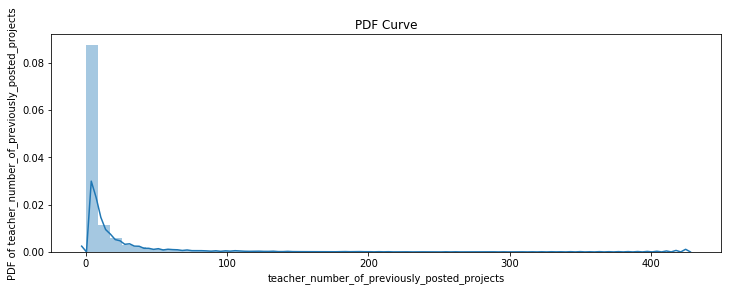

In [115]:
teacher_project = X_test['teacher_number_of_previously_posted_projects']
fig = plt.figure(figsize=(12,4))
sns.distplot(teacher_project)
plt.ylabel('PDF of teacher_number_of_previously_posted_projects')
plt.title('PDF Curve')
plt.show()

<h2>Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)</h2>

In [116]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_vector_tfidf_w2v_train = hstack((Teacher_pre_hot_encoding_fitmodel_train, School_state_onehot_encoding_fitmodel_train,\
            project_subject_categories_onehot_encoding_fitmodel_train,\
            project_subject_subcategories_onehot_encoding_fitmodel_train,\
           Teacher_no_std_train,price_std_train,quantity_std_train,tfidf_w2v_vectors_train,\
            tfidf_w2v_vectors_title_train))

X_vector_tfidf_w2v_cv = hstack((Teacher_pre_hot_encoding_fitmodel_cv, School_state_onehot_encoding_fitmodel_cv,\
            project_subject_categories_onehot_encoding_fitmodel_cv,\
            project_subject_subcategories_onehot_encoding_fitmodel_cv,\
           Teacher_no_std_cv,price_std_cv,quantity_std_cv,tfidf_w2v_vectors_cv,\
            tfidf_w2v_vectors_title_cv))


X_vector_tfidf_w2v_test = hstack((Teacher_pre_hot_encoding_fitmodel_test, School_state_onehot_encoding_fitmodel_test,\
            project_subject_categories_onehot_encoding_fitmodel_test,\
            project_subject_subcategories_onehot_encoding_fitmodel_test,\
           Teacher_no_std_test,price_std_test,quantity_std_test,tfidf_w2v_vectors_test,\
            tfidf_w2v_vectors_title_test))

<h4>Brute Force TFIDFWord2Vec </h4>

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
Dictionay_cv = dict()
Dictionay_train = dict()
list3 = [4,5,6,7,8,15,25,30,50]
list4 = [100,200,500,1000,2000,3000]
for i in tqdm(list3):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = i ,min_samples_split  = 2000,class_weight='balanced')
    DecisionTree_Classifier.fit(X_vector_tfidf_w2v_train,y_final_train)
    # Train Prediction
    prediction_train_log = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_train)
    preds = prediction_train_log[:,1]
    fpr, tpr, thresholds= roc_curve(y_final_train,preds)
    AUC_train = auc(fpr,tpr)
    # CV Prediction
    prediction_cv_log = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_cv)
    preds = prediction_cv_log[:,1]
    fpr, tpr, thresholds= roc_curve(y_cv,preds)
    AUC_cv = auc(fpr,tpr)
    
    # DIctionay updation for cv and train dataset
    Dictionay_cv.update({np.log(i):AUC_cv})
    Dictionay_train.update({np.log(i):AUC_train})

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [12:55<00:00, 94.04s/it]


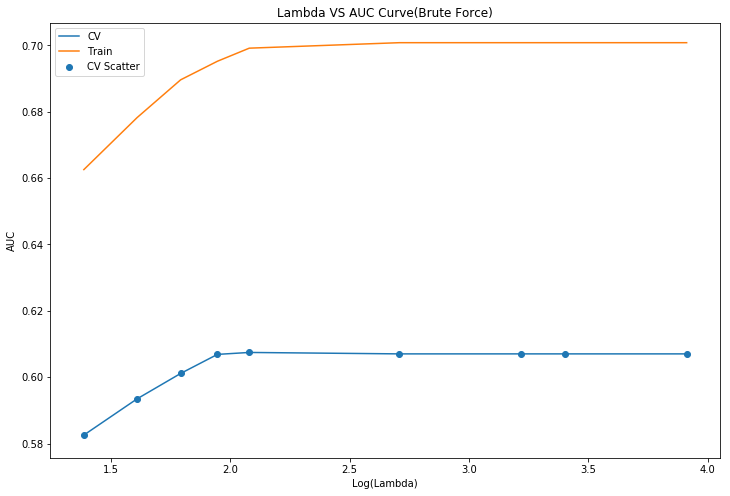

In [76]:
plt.figure(figsize=(12,8))   
plt.plot(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV')
plt.plot(Dictionay_train.keys(),Dictionay_train.values(),label = 'Train')
plt.title('Lambda VS AUC Curve(Brute Force)')
plt.xlabel('Log(Lambda)')
plt.ylabel('AUC')
plt.scatter(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV Scatter')
plt.legend()
plt.show() 

In [166]:
Table_independent = []
Table_independent.append('TFIDF_W2VEC')
Table_independent.append('Brute Force')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('61%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.41647367248498796 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.33887947661279905 for threshold 0.311


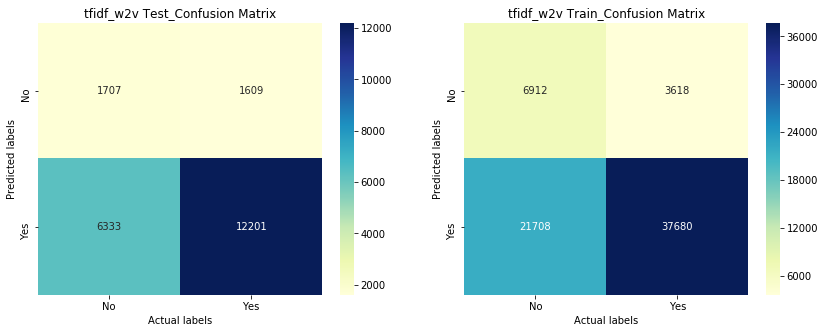

In [77]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_w2v_train,y_final_train)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('tfidf_w2v Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('tfidf_w2v Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

<h4>2 Find the best hyper paramter using k-fold cross validation or simple cross validation data</h4>

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
from sklearn.model_selection import StratifiedKFold
Dictionay_cv_cross_val = dict()
Dictionay_train= dict()
list3 = [4,5,6,7,8]
list4 = [100,200,500,1000,2000,3000]
for k in tqdm(list3):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = k ,min_samples_split  = 1000,class_weight='balanced')
    strfied_k_fold = StratifiedKFold(n_splits = 3,random_state=4)
    scores = cross_validate(DecisionTree_Classifier, X_vector_tfidf_w2v_train, y_final_train, cv=strfied_k_fold, scoring='roc_auc',return_train_score=True)
    #CV
    mean_AUC_cv = np.mean(scores['test_score'])
    Dictionay_cv_cross_val.update({np.log(k):mean_AUC_cv})
    #train
    mean_AUC_train = np.mean(scores['train_score'])
    Dictionay_train.update({np.log(k):mean_AUC_train})

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [13:57<00:00, 172.98s/it]


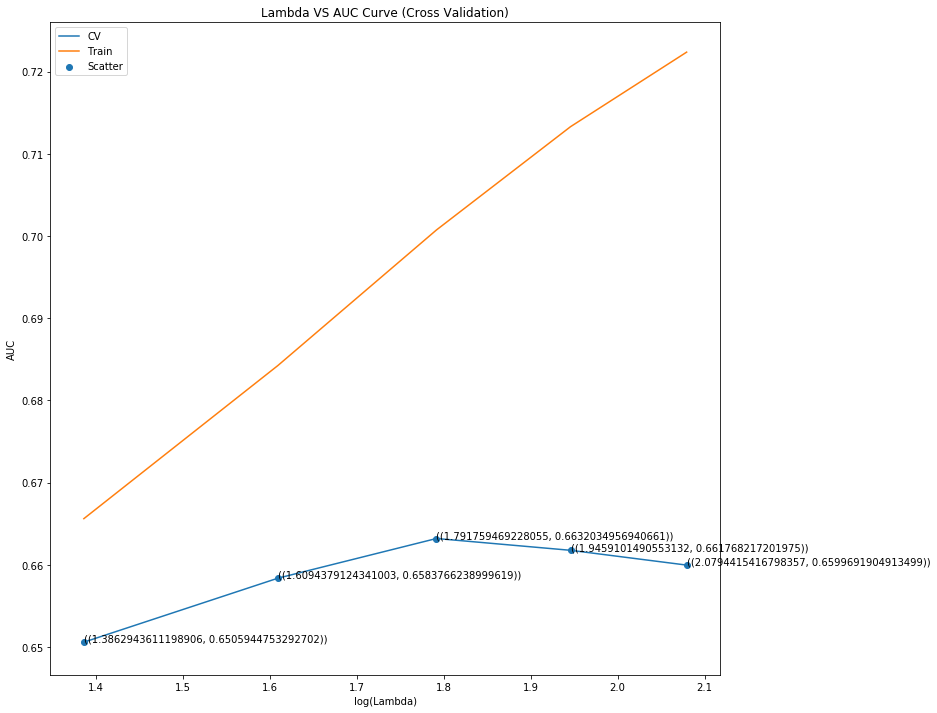

In [81]:
plt.figure(figsize=(12,12))
plt.plot(Dictionay_cv_cross_val.keys(),Dictionay_cv_cross_val.values(),label='CV')
plt.plot(Dictionay_train.keys(),Dictionay_train.values(),label='Train')
plt.scatter(Dictionay_cv_cross_val.keys(),Dictionay_cv_cross_val.values(),label='Scatter')
plt.title('Lambda VS AUC Curve (Cross Validation)')
plt.xlabel('log(Lambda)')
plt.ylabel('AUC')
plt.legend()
for key,value in Dictionay_cv_cross_val.items():
    plt.annotate(s=(f'({key,value})') , xy = (key,value),)
plt.show()

In [167]:
Table_independent = []
Table_independent.append('TFIDF_W2VEC')
Table_independent.append('Stratified_k_fold')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('66%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.41647367248498796 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.33887947661279905 for threshold 0.311


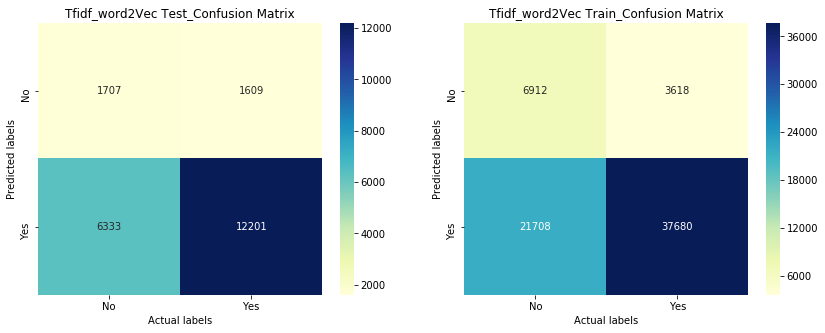

In [84]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_w2v_train,y_final_train)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('Tfidf_word2Vec Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('Tfidf_word2Vec Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

<h4>Random Search for TFIDFword2Vec</h4>

In [85]:
from sklearn.model_selection import RandomizedSearchCV

list3 = [4,5,6,7,8]
list4 = [100,200,500,1000,2000,3000]
parameters = {'max_depth':list3, 'min_samples_split':list4}
Dictionay_train_random = dict()
Dictionay_cv_cross_val = dict()

#########################################################################################    
DecisionTree_Classifier = DecisionTreeClassifier(class_weight='balanced')
random_validation = RandomizedSearchCV(DecisionTree_Classifier,parameters, cv=3, scoring='roc_auc',return_train_score=True)
random_validation.fit(X_vector_tfidf_w2v_train,y_final_train)
AUC_Means_Score_train = random_validation.cv_results_['mean_train_score']
AUC_Means_Score_cv = random_validation.cv_results_['mean_test_score']

Dictionay_cv_cross_val = dict()
for i in range(0,len(AUC_Means_Score_cv)):
    Dictionay_cv_cross_val.update({i: AUC_Means_Score_cv[i]})
for i in range(0,len(AUC_Means_Score_train)):
    Dictionay_train_random.update({i: AUC_Means_Score_train[i]})

No handles with labels found to put in legend.


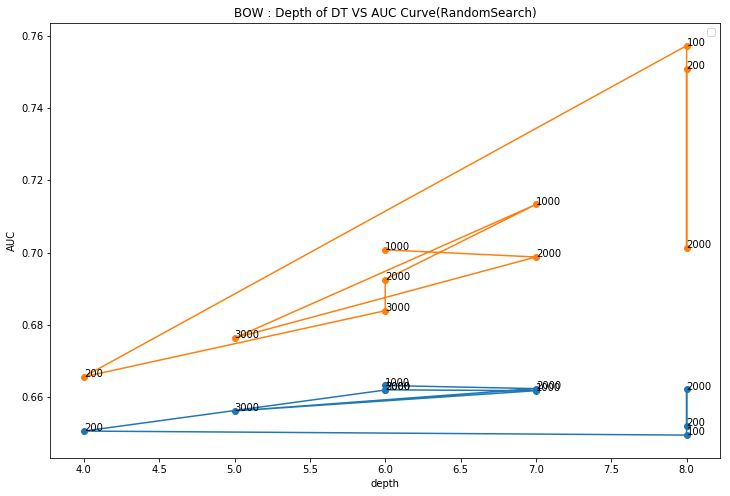

In [86]:
Params_list_depth = []
Params_list_sample_splits = []

for i in range(0,10):
    Params_list_depth.append(random_validation.cv_results_['params'][i]['max_depth'])
    
for i in range(0,10):
    Params_list_sample_splits.append(random_validation.cv_results_['params'][i]['min_samples_split'])    
                      
plt.figure(figsize=(12,8)) 

plt.plot(Params_list_depth,random_validation.cv_results_['mean_test_score'])

plt.plot(Params_list_depth,random_validation.cv_results_['mean_train_score'])

plt.title('BOW : Depth of DT VS AUC Curve(RandomSearch)')
plt.xlabel(f'depth')
plt.ylabel('AUC')
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_test_score'])
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_train_score'])
for i in range(0,10):
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_train_score'][i]))
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_test_score'][i]))
plt.legend()
plt.show()

In [168]:
Table_independent = []
Table_independent.append('TFIDF_W2VEC')
Table_independent.append('RandomizerSearch_cv')
Table_independent.append(7)
Table_independent.append(200)
Table_independent.append('66%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.43819187750509453 for threshold 0.485
the maximum value of tpr*(1-fpr) 0.3403440851313199 for threshold 0.397


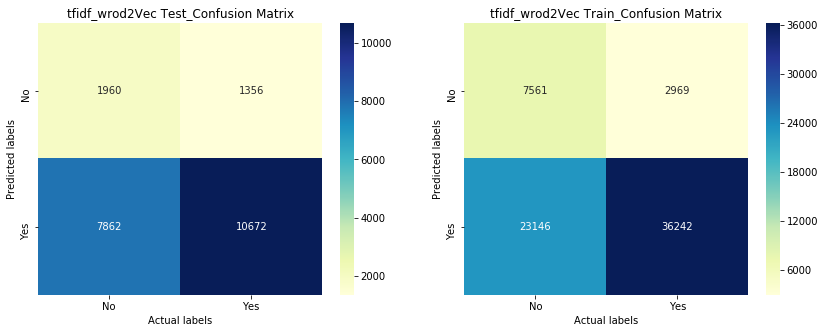

In [87]:

DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 200,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_w2v_train,y_final_train)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('tfidf_wrod2Vec Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('tfidf_wrod2Vec Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

<h4>REprsentation of the Model AvgWord2VEC</h4>

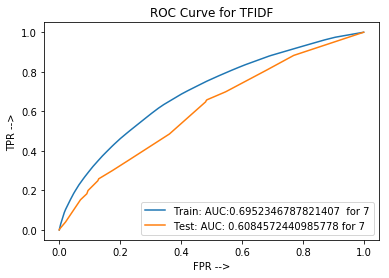

In [89]:
max_depth = 7

DecisionTree_Classifier = DecisionTreeClassifier(max_depth = max_depth ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_w2v_train,y_final_train)
#Train
probs_final_train = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,probs_final_train[:,1])
roc_auc_final_train = auc(fpr_train, tpr_train)
#Test
probs_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,probs_final_test[:,1])
roc_auc_final_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train,tpr_train,label=f'Train: AUC:{roc_auc_final_train}  for {max_depth}')
plt.plot(fpr_test,tpr_test,label=f'Test: AUC: {roc_auc_final_test} for {max_depth}')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.title('ROC Curve for TFIDF')
plt.legend()
plt.show()

the maximum value of tpr*(1-fpr) 0.33769434012514143 for threshold 0.449


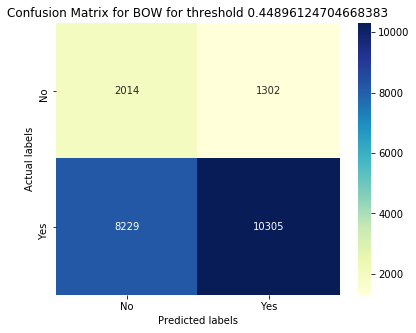

In [117]:
#test
probs_final_test = DecisionTree_Classifier.predict_proba(X_vector_tfidf_w2v_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,probs_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(probs_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
# labels, title and ticks
ax.set_ylabel('Actual labels')
ax.set_xlabel('Predicted labels') 
ax.set_title(f'Confusion Matrix for BOW for threshold {threshold_test}')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

#### Finding False Positive Data Points and creating word cloud

100%|███████████████████████████████████████████████████████████████████████████| 1302/1302 [00:00<00:00, 56849.13it/s]


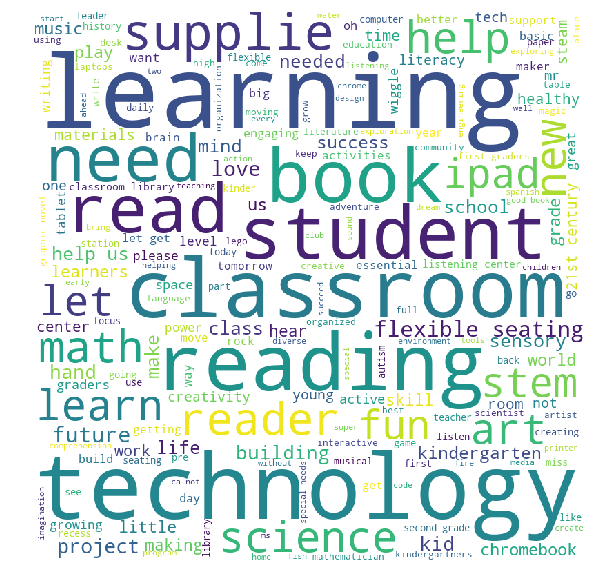

In [118]:
y_pred = pd.Series(prediction_test)
Test_title = pd.Series(preprocessed_title_test)
#y_pred[:].T
y_pred = y_pred.reset_index(drop=True)
Test_title_1 = Test_title.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP = Test_title_1[(y_test_1 == 0) & (y_pred == 1)]
#X_test[y_test != y_pred]
FP_list = FP.tolist() 


from wordcloud import WordCloud

comment_words = ' '
for i in tqdm(range(len(FP_list))): 
    FP_list[i] = FP_list[i].lower() 
          
for words in tqdm(FP_list): 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

#### Creating word cloud for Whole Title Words for comparison for False Positive Words

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 39302.07it/s]


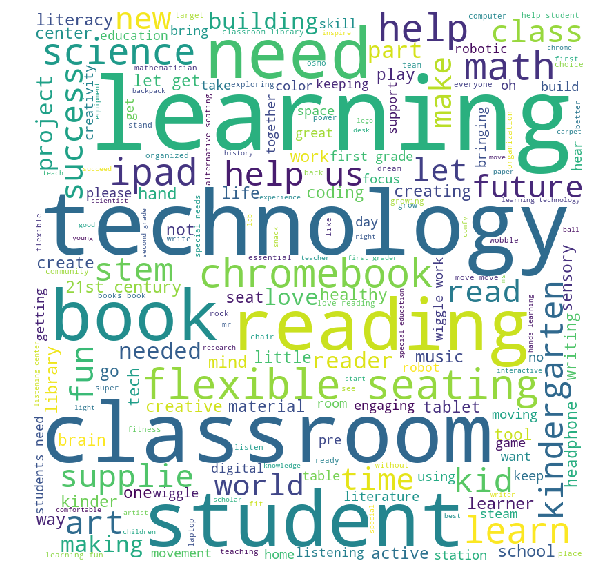

In [120]:
from wordcloud import WordCloud
# Converts each token into lowercase 
comment_words = ' '
for i in tqdm(range(len(preprocessed_title_test))): 
    preprocessed_title_test[i] = preprocessed_title_test[i].lower() 
          
for words in tqdm(preprocessed_title_test): 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Plot the box plot with the `price` of these `false positive data points'

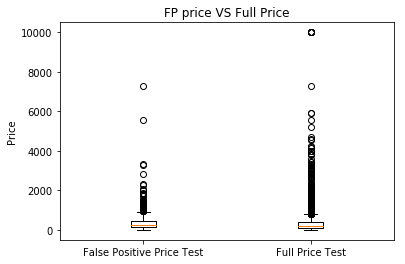

In [121]:
    y_pred = pd.Series(prediction_test)

y_pred = y_pred.reset_index(drop=True)
X_final_train_1 = X_final_train.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop = True)
FP_price = X_test[(y_test_1 == 0) & (y_pred == 1)]



X_price = X_test['price'].reset_index(drop = True)
X_price_FP = FP_price['price'].reset_index(drop = True)
plt.boxplot([X_price_FP,X_price])
plt.ylabel("Price")
plt.title("FP price VS Full Price")
plt.xticks([1,2],["False Positive Price Test","Full Price Test"])
plt.show()

#### Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

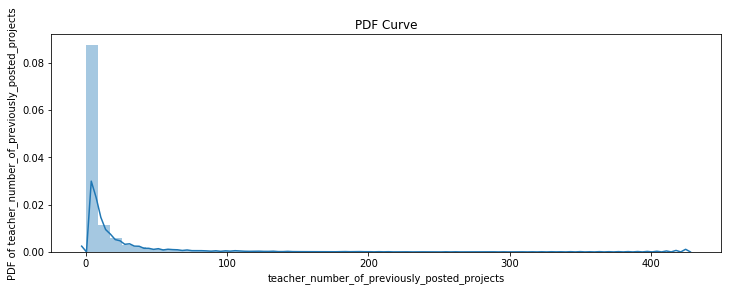

In [122]:
teacher_project = X_test['teacher_number_of_previously_posted_projects']
fig = plt.figure(figsize=(12,4))
sns.distplot(teacher_project)
plt.ylabel('PDF of teacher_number_of_previously_posted_projects')
plt.title('PDF Curve')
plt.show()

#### Task 2 : Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3

In [48]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_vector_tfidf_train = hstack((Teacher_pre_hot_encoding_fitmodel_train, School_state_onehot_encoding_fitmodel_train,\
            project_subject_categories_onehot_encoding_fitmodel_train,\
            project_subject_subcategories_onehot_encoding_fitmodel_train,\
           Teacher_no_std_train,price_std_train,quantity_std_train,text_tfidf_essays_train,\
            text_tfidf_title_train))

X_vector_tfidf_cv = hstack((Teacher_pre_hot_encoding_fitmodel_cv, School_state_onehot_encoding_fitmodel_cv,\
            project_subject_categories_onehot_encoding_fitmodel_cv,\
            project_subject_subcategories_onehot_encoding_fitmodel_cv,\
           Teacher_no_std_cv,price_std_cv,quantity_std_cv,text_tfidf_essays_cv,\
            text_tfidf_title_cv))


X_vector_tfidf_test = hstack((Teacher_pre_hot_encoding_fitmodel_test, School_state_onehot_encoding_fitmodel_test,\
            project_subject_categories_onehot_encoding_fitmodel_test,\
            project_subject_subcategories_onehot_encoding_fitmodel_test,\
           Teacher_no_std_test,price_std_test,quantity_std_test,text_tfidf_essays_test,\
            text_tfidf_title_test))

In [50]:
from sklearn.tree import DecisionTreeClassifier
max_depth = 7

DecisionTree_Classifier = DecisionTreeClassifier(max_depth = max_depth ,min_samples_split  = 200,class_weight='balanced')
DecisionTree_Classifier.fit(X_vector_tfidf_train,y_final_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
a = DecisionTree_Classifier.feature_importances_
b = sorted(a,reverse=True)
b

[0.23950529162433887,
 0.2314923352769839,
 0.09592376451077594,
 0.08343755735894513,
 0.06954605782548087,
 0.06580443501649176,
 0.014393428371495475,
 0.007863910543386131,
 0.007502931197630761,
 0.007221728988999793,
 0.0069015029907779305,
 0.006767045463327335,
 0.006150117109791918,
 0.005804734752711653,
 0.0055783417699762665,
 0.004698992015214363,
 0.0045878206293174725,
 0.004328126820417872,
 0.004025582881499488,
 0.00393093581693492,
 0.003899807602391402,
 0.003888328919240232,
 0.003876620927233254,
 0.0038274051272735973,
 0.003795072474557435,
 0.0037733615383996996,
 0.003684064757818528,
 0.0036823684413498144,
 0.0034915199885214563,
 0.0034878573943207865,
 0.003436584789536792,
 0.0034160456359968168,
 0.0033527267800504247,
 0.0033367467237551333,
 0.003327504379375087,
 0.003235203604653892,
 0.0032033409754432087,
 0.0031718101535400953,
 0.003164676143732586,
 0.0030861450241380845,
 0.003009953319936918,
 0.002995190819113654,
 0.002960916495897421,
 0.00

In [75]:
Array_final = X_vector_tfidf_train.toarray()

In [120]:
Array_test = X_vector_tfidf_test.toarray()

In [137]:
Array_cv = X_vector_tfidf_cv.toarray()

In [138]:
print(X_vector_tfidf_train.shape)
print(X_vector_tfidf_test.shape)
print(X_vector_tfidf_cv.shape)


(69918, 6098)
(21850, 6098)
(17480, 6098)


In [76]:
list1 = []
set2 = []
index = []

count=0
for i in range(len(b)):
    if b[i]==0:
        count+=1
        #none
    else:
        list1.append(i)
        set2.append(graph2[i])
        count+=1
        index.append(i)
print(len(list1))
print(len(set2))

62
62


In [149]:
Array_final_set = []
Array_Test_set = []
Array_cv_set = []
feature_list = []

for i in index:
    Array_final_set.append(Array_final[:,i])
    Array_Test_set.append(Array_test[:,i])
    Array_cv_set.append(Array_cv[:,i])
    feature_list.append(graph2[i])
print(f'x_train : {len(Array_final_set)}')
print(f'x_test : {len(Array_Test_set)}')
print(f'x_cv : {len(Array_cv_set)}')

x_train : 62
x_test : 62
x_cv : 62


In [150]:
feature_list

['dr',
 'mr',
 'mrs',
 'ms',
 'teacher',
 'ak',
 'al',
 'ar',
 'az',
 'ca',
 'co',
 'ct',
 'dc',
 'de',
 'fl',
 'ga',
 'hi',
 'ia',
 'id',
 'il',
 'in',
 'ks',
 'ky',
 'la',
 'ma',
 'md',
 'me',
 'mi',
 'mn',
 'mo',
 'ms',
 'mt',
 'nc',
 'nd',
 'ne',
 'nh',
 'nj',
 'nm',
 'nv',
 'ny',
 'oh',
 'ok',
 'or',
 'pa',
 'ri',
 'sc',
 'sd',
 'tn',
 'tx',
 'ut',
 'va',
 'vt',
 'wa',
 'wi',
 'wv',
 'wy',
 'appliedlearning',
 'care_hunger',
 'health_sports',
 'history_civics',
 'literacy_language',
 'math_science']

In [142]:
np_array = np.array(Array_final_set)
np_array_T = np_array.T
print(np_array_T.shape)

np_array_test = np.array(Array_Test_set)
np_array_test_T = np_array_test.T
print(np_array_test_T.shape)

np_array_cv = np.array(Array_cv_set)
np_array_cv_T = np_array_cv.T
print(np_array_cv_T.shape)

(69918, 62)
(21850, 62)
(17480, 62)


In [143]:
y_final_1 =  y_final_train.reset_index(drop=True)
y_test_1 = y_test.reset_index(drop=True)
y_cv_1 = y_cv.reset_index(drop=True)

### Tesk 2 Brute Force for best 62  other than that all are zero feature importance

In [144]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
list1=[]
Dictionay_cv = dict()
Dictionay_train = dict()
list3 = [4,5,6,7,8,15,25,35]
list4 = [100,200,500,1000,2000,3000]
for i in tqdm(list3):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = i ,min_samples_split  = 2000,class_weight='balanced')
    DecisionTree_Classifier.fit(np_array_T,y_final_1)
    # Train Prediction
    prediction_train_log = DecisionTree_Classifier.predict_proba(np_array_T)
    preds = prediction_train_log[:,1]
    fpr, tpr, thresholds= roc_curve(y_final_1,preds)
    AUC_train = auc(fpr,tpr)
    # CV Prediction
    prediction_cv_log = DecisionTree_Classifier.predict_proba(np_array_cv_T)
    preds = prediction_cv_log[:,1]
    fpr, tpr, thresholds= roc_curve(y_cv_1,preds)
    AUC_cv = auc(fpr,tpr)
    
    # DIctionay updation for cv and train dataset
    Dictionay_cv.update({i:AUC_cv})
    Dictionay_train.update({i:AUC_train})	

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.05it/s]


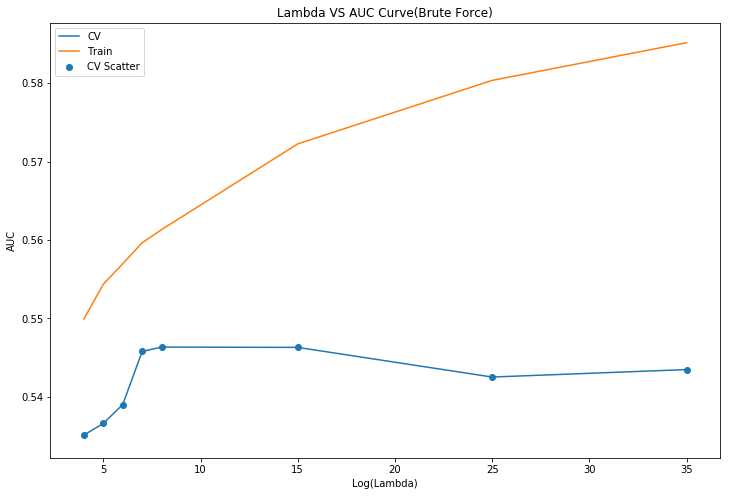

In [145]:
plt.figure(figsize=(12,8))   
plt.plot(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV')
plt.plot(Dictionay_train.keys(),Dictionay_train.values(),label = 'Train')
plt.title('Lambda VS AUC Curve(Brute Force)')
plt.xlabel('Log(Lambda)')
plt.ylabel('AUC')
plt.scatter(Dictionay_cv.keys(),Dictionay_cv.values(),label = 'CV Scatter')
plt.legend()
plt.show()

In [169]:
Table_independent = []
Table_independent.append('Task5')
Table_independent.append('Brute Force')
Table_independent.append(7)
Table_independent.append(2000)
Table_independent.append('54%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.29816336029207313 for threshold 0.52
the maximum value of tpr*(1-fpr) 0.2967470666175671 for threshold 0.52


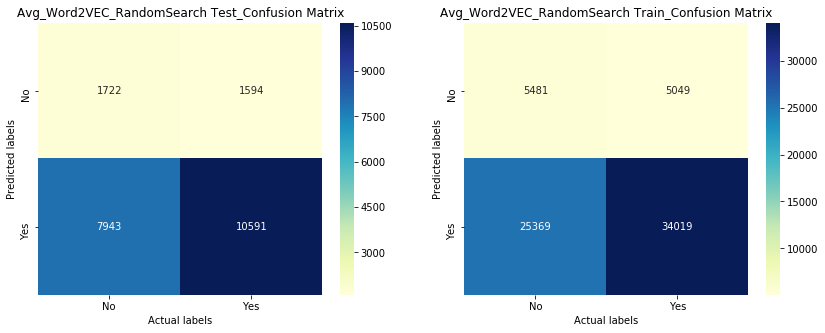

In [146]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(np_array_T,y_final_1)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(np_array_T)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_1,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_1,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(np_array_test_T)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test_1,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('Avg_Word2VEC_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('Avg_Word2VEC_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

#### Cross validation method for best 63 features

In [131]:
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import SCORERS
from sklearn.model_selection import StratifiedKFold
Dictionay_cv_cross_val = dict()
Dictionary_train = dict()
list3 = [4,5,6,7,8]
for k in tqdm(list3):
    DecisionTree_Classifier = DecisionTreeClassifier(max_depth = k ,min_samples_split  = 200,class_weight='balanced')
    strfied_k_fold = StratifiedKFold(n_splits = 3,random_state=4)
    scores = cross_validate(DecisionTree_Classifier, np_array_T, y_final_1, cv=strfied_k_fold, scoring='roc_auc',return_train_score=True)
    #CV
    mean_AUC_cv = np.mean(scores['test_score'])
    Dictionay_cv_cross_val.update({k:mean_AUC_cv})
    #train
    mean_AUC_train = np.mean(scores['train_score'])
    Dictionary_train.update({k:mean_AUC_train})

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  1.98s/it]


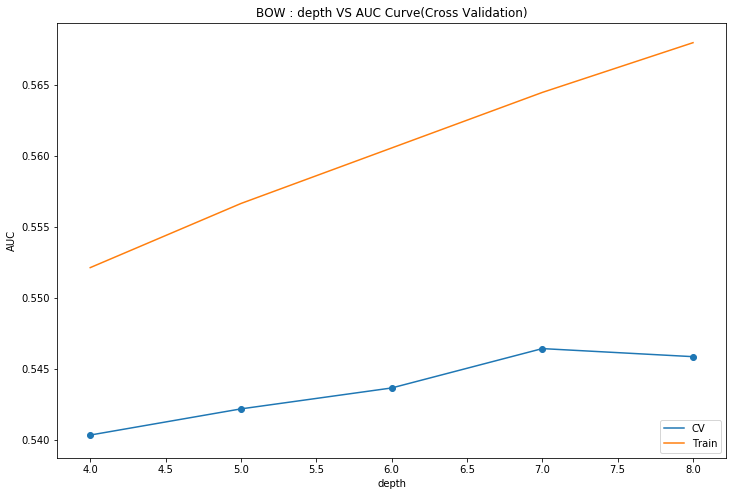

In [132]:
plt.figure(figsize=(12,8))
plt.plot(Dictionay_cv_cross_val.keys(),Dictionay_cv_cross_val.values(),label='CV')
plt.plot(Dictionary_train.keys(),Dictionary_train.values(),label='Train')
plt.title('BOW : depth VS AUC Curve(Cross Validation)')
plt.xlabel('depth')
plt.scatter(Dictionay_cv_cross_val.keys(),Dictionay_cv_cross_val.values())
plt.ylabel('AUC')

plt.legend(loc = 'lower right')
plt.show()

In [170]:
Table_independent = []
Table_independent.append('Task5')
Table_independent.append('Stratified_k_fold')
Table_independent.append(7)
Table_independent.append(3000)
Table_independent.append('54%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.29816336029207313 for threshold 0.52
the maximum value of tpr*(1-fpr) 0.2975619872739345 for threshold 0.473


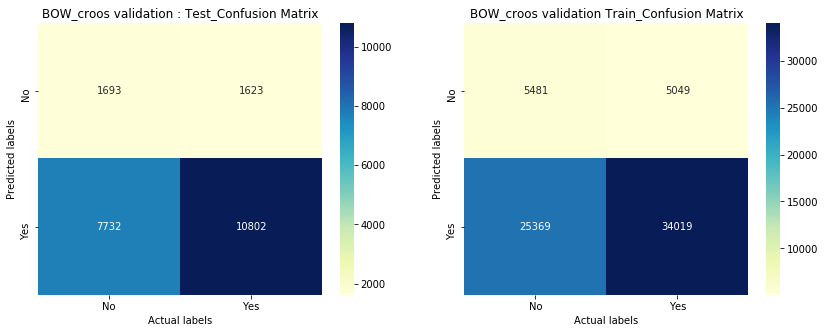

In [134]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 3000,class_weight='balanced')
DecisionTree_Classifier.fit(np_array_T,y_final_1)

#Train
DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(np_array_T)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_1,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(np_array_test_T)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)


#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt = 'd'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('BOW_croos validation : Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('BOW_croos validation Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

#### Random Search for 63 feature _importance features

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
list3 = [4,5,6,7,8]
list4 = [100,200,500,1000,2000,3000]
parameters = {'max_depth':list3 , 
              'min_samples_split': list4 }
Dictionay_train_random = dict()
 #########################################################################################  
DecisionTree_Classifier = DecisionTreeClassifier(class_weight='balanced')
random_validation = RandomizedSearchCV(DecisionTree_Classifier,parameters, cv=3, scoring='roc_auc',return_train_score=True)
random_validation.fit(np_array_T,y_final_1)

AUC_Means_Score_train = random_validation.cv_results_['mean_train_score']
AUC_Means_Score_cv = random_validation.cv_results_['mean_test_score']

Dictionay_cv_cross_val = dict()
for i in range(0,len(AUC_Means_Score_cv)):
    Dictionay_cv_cross_val.update({i: AUC_Means_Score_cv[i]})
for i in range(0,len(AUC_Means_Score_train)):
    Dictionay_train_random.update({i: AUC_Means_Score_train[i]}) 

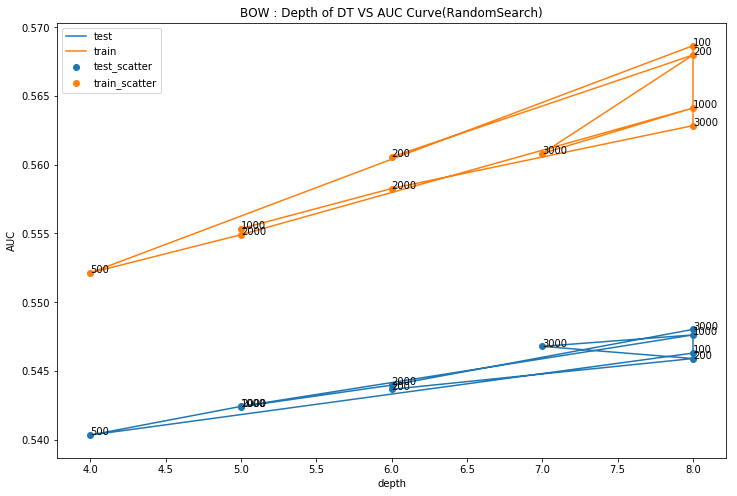

In [118]:
Params_list_depth = []
Params_list_sample_splits = []

for i in range(0,10):
    Params_list_depth.append(random_validation.cv_results_['params'][i]['max_depth'])
    
for i in range(0,10):
    Params_list_sample_splits.append(random_validation.cv_results_['params'][i]['min_samples_split'])    
                      
plt.figure(figsize=(12,8)) 

plt.plot(Params_list_depth,random_validation.cv_results_['mean_test_score'],label = 'test')

plt.plot(Params_list_depth,random_validation.cv_results_['mean_train_score'],label = 'train')

plt.title('BOW : Depth of DT VS AUC Curve(RandomSearch)')
plt.xlabel(f'depth')
plt.ylabel('AUC')
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_test_score'],label = 'test_scatter')
plt.scatter(Params_list_depth,random_validation.cv_results_['mean_train_score'],label ='train_scatter')
for i in range(0,10):
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_train_score'][i]))
    plt.annotate(s=random_validation.cv_results_['params'][i]['min_samples_split'] , xy = (random_validation.cv_results_['params'][i]['max_depth'],random_validation.cv_results_['mean_test_score'][i]))
plt.legend()
plt.show()

In [171]:
Table_independent = []
Table_independent.append('Task5')
Table_independent.append('randomSearch')
Table_independent.append(7)
Table_independent.append(3000)
Table_independent.append('54%')
Total_list.append(Table_independent)

the maximum value of tpr*(1-fpr) 0.29816336029207313 for threshold 0.52
the maximum value of tpr*(1-fpr) 0.2975619872739345 for threshold 0.473


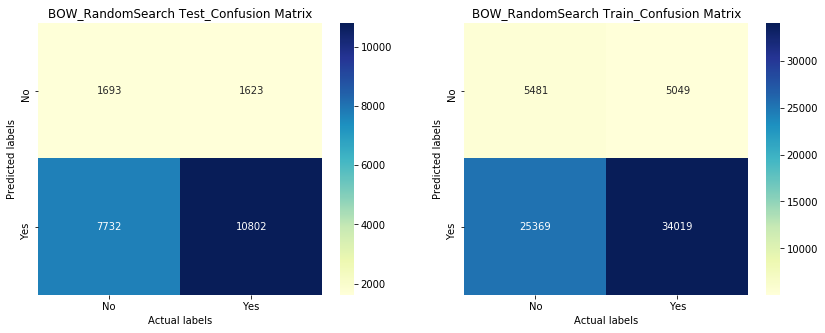

In [130]:
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 3000,class_weight='balanced')
DecisionTree_Classifier.fit(np_array_T,y_final_1)

DecisionFunction_final_train = DecisionTree_Classifier.predict_proba(np_array_T)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_train,DecisionFunction_final_train[:,1])
threshold_train = find_best_threshold(thresholds_train,fpr_train,tpr_train)
prediction_train = predict_with_best_t(DecisionFunction_final_train[:,1],threshold_train)
cm_train = confusion_matrix(y_final_train,prediction_train)

#test
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(np_array_test_T)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test,prediction_test)

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/4801878
fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels') 
ax.set_title('BOW_RandomSearch Test_Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

ax1= plt.subplot(1,2,2)
sns.heatmap(cm_train, annot=True, ax = ax1,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
ax1.set_xlabel('Actual labels')
ax1.set_ylabel('Predicted labels') 
ax1.set_title('BOW_RandomSearch Train_Confusion Matrix')
ax1.xaxis.set_ticklabels(['No', 'Yes'])
ax1.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

### Representation for featured important features 63

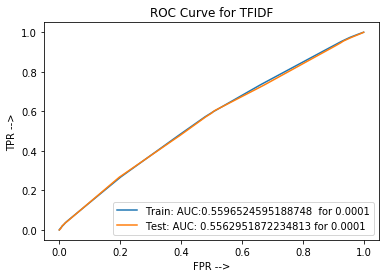

In [147]:
alpha = 10**-4
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 7 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(np_array_T,y_final_1)
#Train
probs_final_train = DecisionTree_Classifier.predict_proba(np_array_T)
fpr_train, tpr_train, thresholds_train = roc_curve(y_final_1,probs_final_train[:,1])
roc_auc_final_train = auc(fpr_train, tpr_train)
#Test
probs_final_test = DecisionTree_Classifier.predict_proba(np_array_test_T)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_1,probs_final_test[:,1])
roc_auc_final_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train,tpr_train,label=f'Train: AUC:{roc_auc_final_train}  for {alpha}')
plt.plot(fpr_test,tpr_test,label=f'Test: AUC: {roc_auc_final_test} for {alpha}')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.title('ROC Curve for TFIDF')
plt.legend()
plt.show()

#### Confusion Matrix for feature implortant features 63

the maximum value of tpr*(1-fpr) 0.2967470666175671 for threshold 0.52


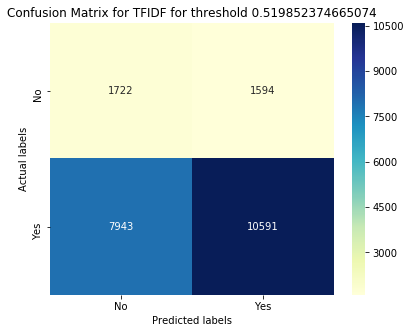

In [148]:
#############  optimized threshold confusion metrix #################
DecisionFunction_final_test = DecisionTree_Classifier.predict_proba(np_array_test_T)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,DecisionFunction_final_test[:,1])
threshold_test = find_best_threshold(thresholds_test,fpr_test,tpr_test)
prediction_test = predict_with_best_t(DecisionFunction_final_test[:,1],threshold_test)
cm_test = confusion_matrix(y_test_1,prediction_test)

fig = plt.figure(figsize=(14,5))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_test, annot=True, ax = ax,cmap='YlGnBu',fmt='d'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title(f'Confusion Matrix for TFIDF for threshold {threshold_test}')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show()

In [155]:
from sklearn import tree
DecisionTree_Classifier = DecisionTreeClassifier(max_depth = 4 ,min_samples_split  = 2000,class_weight='balanced')
DecisionTree_Classifier.fit(np_array_T,y_final_1)

with open("Task5.txt", "w") as f:
    f = tree.export_graphviz(DecisionTree_Classifier,filled=True, out_file=f,feature_names=feature_list)

<li>Decision tree diagram for Task 5 Feature important features
        <img src='Task5.png' width=2000px>

In [172]:
from prettytable import PrettyTable
Table = PrettyTable()
Table.field_names = ['Vectorizer','Model','Depth','Max_split','AUC']

for i in tqdm(Total_list):
    Table.add_row(i)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


In [173]:
print(Table)

+-------------+---------------------+-------+-----------+-----+
|  Vectorizer |        Model        | Depth | Max_split | AUC |
+-------------+---------------------+-------+-----------+-----+
|     BOW     |     Brute Force     |   7   |    200    | 64% |
|     BOW     |  Stratified_k_fold  |   7   |    200    |  67 |
|     BOW     | RandomizerSearch_cv |   8   |    2000   | 68% |
|    TFIDF    |     Brute Force     |   7   |    2000   | 62% |
|    TFIDF    |  Stratified_k_fold  |   7   |    2000   | 68% |
|    TFIDF    | RandomizerSearch_cv |   7   |    2000   | 68% |
|  AVG_W2VEC  |     Brute Force     |   7   |    2000   | 62% |
|  AVG_W2VEC  |  Stratified_k_fold  |   7   |    2000   | 66% |
|  AVG_W2VEC  | RandomizerSearch_cv |   7   |    2000   |  66 |
| TFIDF_W2VEC |     Brute Force     |   7   |    2000   | 61% |
| TFIDF_W2VEC |  Stratified_k_fold  |   7   |    2000   | 66% |
| TFIDF_W2VEC | RandomizerSearch_cv |   7   |    200    | 66% |
|    Task5    |     Brute Force     |   